# Исследование продаж компьютерных игр

# Введение

**Цель проекта** - провести анализ данных о продажах игр на различных платформах в трех регионах мира. 
<br>А именно:
* Исследовать факторы, влияющие на количество продаж.
* Дать прогноз развития игрового рынка на год вперед.
* Дать рекомендации по повышению продаж и росту прибыли.

**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

Проект будет выполнен по плану, представленному ниже.

# План работы

1. [**Загрузка данных.**](#1-bullet)


2. [**Подготовка данных.**](#2-bullet)

   * Замена названий столбцов;
   * Преобразование типов данных;
   * Обработка пропусков;
   * Подсчет общего количества продаж.


3. [**Исследовательский анализ данных.**](#3-bullet)

   3.1 [Исследование количества выпускаемых игр ежегодно](#3.1-bullet)
   <br>3.2 [Исследование разницы количества продаж по платформам](#3.2-bullet)
   <br>3.3 [Исследование продаж по жанрам](#3.3-bullet)
   
   
4. [**Составление портрета пользователя каждого региона.**](#4-bullet)

   4.1 [Распределение продаж по платформам](#4.1-bullet)
   <br>4.2 [Распределение продаж по жанрам](#4.2-bullet)
   <br>4.3 [Распределени продаж по возрастных категориям](#4.3-bullet)
   
   
5. [**Проверка гипотез.**](#5-bullet)

   5.1 [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.](#5.1-bullet)
   <br>5.2 [Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.](#5.2-bullet)


6. [**Общий вывод.**](#6-bullet)

In [1]:
# импортируем необходимые библиотеки
import pandas as pd

import matplotlib.pyplot as plt

import warnings

import numpy as np

import plotly as pl

import seaborn as sns

from scipy import stats as st

In [2]:
# warnings.filterwarnings("ignore")

<a class='anchor' id='1-bullet'></a>
## Загрузка данных

**Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраним их в датафреймы**

In [3]:
# считаем исторические данные и поместим в переменную 'data'
try:
    data = pd.read_csv('/datasets/games.csv', sep=',')
except:
    data = pd.read_csv(r"C:\Users\Александр\Desktop\Аналитика данных\ПРОЕКТЫ\Сборный проект\games.csv", sep=',')

**Выведим первые строки данных.**

In [4]:
# выведем первые 10 строк датафрейма
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Изучим общую информацию.**

In [5]:
# выведем общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод 1**

В датафрейме 16715 строк и 11 столбцов.  Типы данных - *object* и *float64*.

Неполнотой данных отличились следующие столбцы:

 - *Name*
 - *Year_of_Release*
 - *Genre*
 - *Critic_Score*
 - *User_Score*
 - *Rating*
 
Необходимо проверить пропуски в данных столбцах и обработать их.

<a class='anchor' id='2-bullet'></a>
## Подготовка данных

### Заменим названия столбцов (приведем к нижнему регистру).

In [6]:
# проведем замену названий столбцов
columns_name = list(map(lambda x: x.lower(), data.columns))
data.columns = columns_name

# выведем переименованные столбцы
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразуем типы данных.

Преобразовать типы данных  стоит в следущих столбцах:

 * *year_of_release* - год релиза лучше преобразовать из *float64* в *int64*;
 * *critic_score* - оценку критика также лучше преобразовать *float64* в *int64*.



In [7]:
# пользуемся функцией "to_numeric" с параметром "coerce", благодаря которой все пропуски однозначно будут заменены на "NaN"
data.loc[:, 'year_of_release'] = pd.to_numeric(data.loc[:, 'year_of_release'], errors='coerce')
# округляем вниз возможные дробные значения и преобразуем в Int64
data.loc[:, 'year_of_release'] = np.round(data.loc[:, 'year_of_release'], 0).astype('Int64')

C:\Users\Александр\AppData\Local\Temp\ipykernel_7200\1023030682.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 2006, 2006, 2009, 1984,
 ...
 2009, 2003, 2014, 2002, 2008, 2016, 2006, 2016, 2003, 2016]
Length: 16715, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[:, 'year_of_release'] = np.round(data.loc[:, 'year_of_release'], 0).astype('Int64')


In [8]:
# пользуемся функцией "to_numeric" с параметром "coerce", благодаря которой все пропуски однозначно будут заменены на "NaN"
data.loc[:, 'critic_score'] = pd.to_numeric(data.loc[:, 'critic_score'], errors='coerce')
# округляем вниз возможные дробные значения и преобразуем в Int64
data.loc[:, 'critic_score'] = np.round(data.loc[:, 'critic_score'], 0).astype('Int64')

C:\Users\Александр\AppData\Local\Temp\ipykernel_7200\1095417267.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[  76, <NA>,   82,   80, <NA>, <NA>,   89,   58,   87, <NA>,
 ...
   63, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>]
Length: 16715, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[:, 'critic_score'] = np.round(data.loc[:, 'critic_score'], 0).astype('Int64')


In [9]:
# выведем информацию после преобразований
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


*Преобразование проведено успешно*

### Обработка дубликатов.

In [10]:
# выведем количество явных дубликатов
data.duplicated().sum()

0

Явных дубликатов не нашлось.
<br> Неявные дубликаты могут появиться ввиду сбора данных из разных источников, либо лагов во время сбора информации.
<br>Попробуем найти неявные дубликаты по 4 столбцам - "name", "platform", "year_of_release" и "genre".
Данного набора столбцов для поиска неявных дубликатов будет достаточно, для достижения нашей цели.

In [11]:
# выведем сумму неявных дубликатов
data.duplicated(subset=['name', 'platform', 'year_of_release', 'genre']).sum()

2

Нашлось 2 строки с неявными дубликатами. Выведем данные строки для ознакомления.

In [12]:
# выведем дубликаты
data[data.duplicated(subset=['name', 'platform', 'year_of_release', 'genre'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993,NaN,0.0,0.00,0.03,0.0,<NA>,NaN,NaN
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83,5.5,E


In [13]:
# выведем все строки с неявными дубликатами
print(data[(data['name'].isna()) & (data['platform'] == 'GEN') & (data['year_of_release'] == 1993) & (data['genre'].isna())])
data[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3') & (data['year_of_release'] == 2012) & (data['genre'] == 'Sports')]

      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN             1993   NaN      1.78      0.53      0.00   
14244  NaN      GEN             1993   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08          <NA>        NaN    NaN  
14244         0.00          <NA>        NaN    NaN  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


Нулевые показатели продаж подтверждают наши предположения о том, что дубликаты появились ошибочно. <br> Удалим дубликаты, оставив первые строки вхождения.

In [14]:
# удалим дубликаты
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre'], keep='first')

In [15]:
# проверим правильность удаления
print(data[(data['name'].isna()) & (data['platform'] == 'GEN') & (data['year_of_release'] == 1993) & (data['genre'].isna())])
data[(data['name'] == 'Madden NFL 13') & (data['platform'] == 'PS3') & (data['year_of_release'] == 2012) & (data['genre'] == 'Sports')]

    name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659  NaN      GEN             1993   NaN      1.78      0.53       0.0   

     other_sales  critic_score user_score rating  
659         0.08          <NA>        NaN    NaN  


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E


*Дубликаты удалены успешно.*

### Обработка пропусков.

In [16]:
# выведем данные о пропусках
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Какие действия предпримем:

 - *name* - пропусков всего 1. Скорее всего пропуски появились ввиду ошибки при заполнении данных. *Удалим строки с данными пропусками*;
 - *year_of_release* - пропусков 269. Число не особо велико, а заполнить пропуски средним или медианой нельзя. *Удалим строки с пропусками в данном столбце*;
 - *genre* - пропуск всего 1. *Удалим строки с пропусками*;
 - *critic_score* - количество пропусков равно 8577. Причиной такого большого количества пропусков может быть банальное отсутствие официального рейтинга критиков. Либо ошибки при заполнении. Удалять такое большое количество пропусков нельзя, поэтому, исследуем данные и скорее всего *заполним пропуски медианными значениями рейтинга по жанрам*;
 - *user_score* - пропусков достаточно много - 6700, происхождение которых также можно объяснить отсутствием данных, либо ошибке при заполнении. Также, в столбце присутствуют загадочные значения "tbd", которые необходимо исследовать;
 - *rating* - данный столбец хранит данные о возрастных категориях. Пропусков много, целых 6765. Заполнять нечем, *оставим пропуски без вмешательств.*

Для начала разберемся со значениям 'tbd', так как они не дают нам пребразовать тип данных в "float" и заполнить пропуски.

In [17]:
# выведем количество строк со значением 'tbd'
len(data[(data['user_score'] == 'tbd')])

2424

Количество строк со значением 'tbd' в столбце 'user_score' равно 2424. Значительное число. Итак, аббревиатура *"tbd"* расшифровывается, как *"To Be Determuned"*, что переводится, как "*Будет определено"*. Получается, причиной данного заполнения является то, что рейтинг еще не подсчитан. 

Итак, *для начала в столбце **user_score"** заменим тип данных на "float"*.  

In [18]:
# заменим тип данных на "float"
data.loc[:, 'user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

**"critic_score"**

In [19]:
# выведем данные о столбце 'critic_score'
data['critic_score'].describe()

count       8136.0
mean     68.965954
std      13.938153
min           13.0
25%           60.0
50%           71.0
75%           79.0
max           98.0
Name: critic_score, dtype: Float64

In [20]:
# создадим датафрейм с медианным значением рейтинга критиков и пользователей для каждого из жанров
data_genre = data.pivot_table(index='genre', values=['critic_score', 'user_score'], aggfunc=['median', 'mean'])
data_genre.columns = ['critic_med', 'user_med', 'critic_sr', 'user_sr']
data_genre

,critic_med,user_med,critic_sr,user_sr
genre,,,,
Action,68.0,7.4,66.629101,7.054044
Adventure,66.0,7.6,65.331269,7.133
Fighting,72.0,7.6,69.217604,7.302506
Misc,69.0,7.1,66.619503,6.819362
Platform,69.0,7.7,68.05835,7.301402
Puzzle,70.0,7.5,67.424107,7.175
Racing,69.0,7.4,67.963612,7.036193
Role-Playing,74.0,7.8,72.652646,7.619515
Shooter,73.0,7.4,70.181144,7.041883


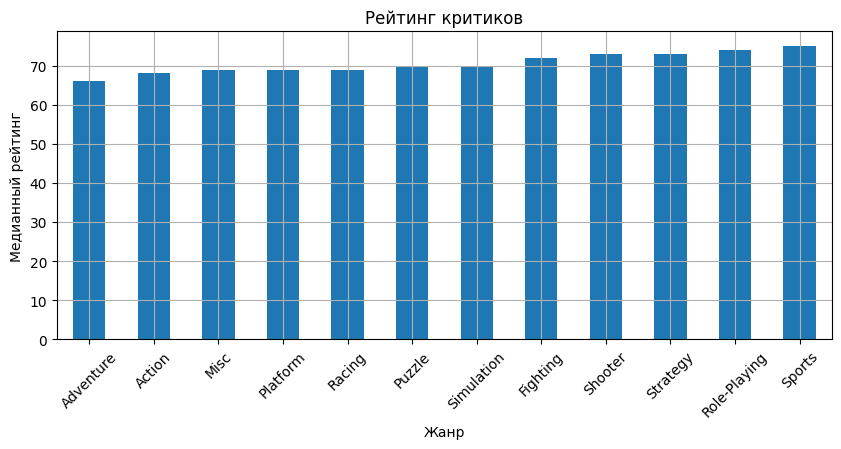

In [21]:
# выведем столбчатую диаграмму медианы рейтинга критиков по жанрам
data_genre['critic_med'].sort_values(ascending=True).plot.bar(figsize=(10, 4), rot=45)
plt.grid(True)
plt.xlabel('Жанр')
plt.ylabel('Медианный рейтинг')
plt.title('Рейтинг критиков')

plt.show()

*По столбчатой диаграмме видно, что медианы рейтинга по жанрам отличаются друг от друга. Поэтому, заполним пропуски медианными значениями рейтинга каждого жанра.*

**"user_score"**

In [22]:
# выведем данные о столбце 'user_score'
data['user_score'].describe()

count     7589.0
unique      95.0
top          7.8
freq       324.0
Name: user_score, dtype: float64

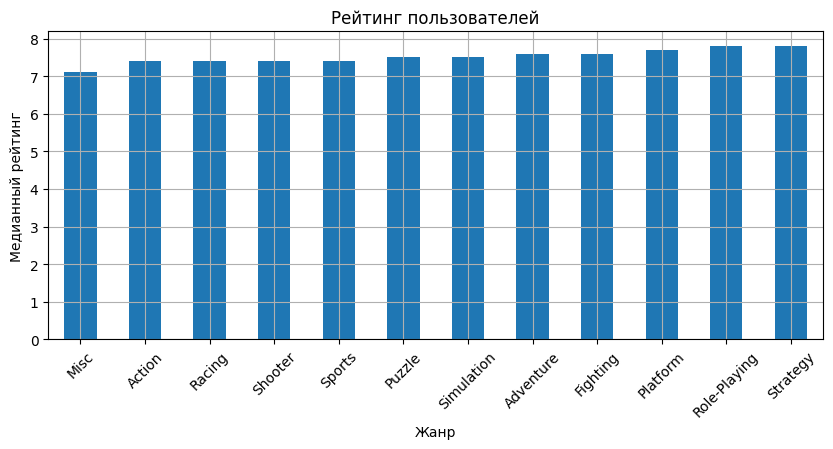

In [23]:
# построим столбчатую диаграмму медианы рейтинга пользователей по жанрам
data_genre['user_med'].sort_values(ascending=True).plot.bar(figsize=(10, 4), rot=45)
plt.grid(True)
plt.xlabel('Жанр')
plt.ylabel('Медианный рейтинг')
plt.title('Рейтинг пользователей')

plt.show()

Медианы рейтинга пользователей по жанрам также отличаются. *Заполним пропуски медианным значением рейтинга пользователей по жанрам*. 

**rating**

Пропуски в данном столбце оставим без изменений.

**Удалим строки с пропусками в столбцах *name, year_of_release и genre*.**

In [24]:
# удалим строки с пропусками в столбцах *name, year_of_release и genre*
data = data.loc[(data['name'].isna() == False) & (data['year_of_release'].isna() == False) & (data['genre'].isna() == False), :]

**Заполним данные в столбцах *"critic_score" и "user_score"* на медианы рейтингов по жанрам.**

In [25]:
# заполним пропуски в столбце "critic_score"
for i in list(data.loc[data['critic_score'].isna(), 'genre'].unique()):
    data.loc[(data['critic_score'].isna()) & (data['genre'] == i), 'critic_score'] = data['critic_score'].fillna(data_genre.loc[i, 'critic_med'])

In [26]:
# заполним пропуски в столбце "user_score"
for i in list(data.loc[data['user_score'].isna(), 'genre'].unique()):
    data.loc[(data['user_score'].isna()) & (data['genre'] == i), 'user_score'] = data['user_score'].fillna(data_genre.loc[i, 'user_med'])

C:\Users\Александр\AppData\Local\Temp\ipykernel_7200\3822812502.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.loc[(data['user_score'].isna()) & (data['genre'] == i), 'user_score'] = data['user_score'].fillna(data_genre.loc[i, 'user_med'])
C:\Users\Александр\AppData\Local\Temp\ipykernel_7200\3822812502.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.loc[(data['user_score'].isna()) & (data['genre'] == i), 'user_score'] = data['user_score'].fillna(data_genre.loc[i, 'user_med'])
C:\Users\Александр\AppData\Local\Temp\ipykernel_7200\3822812

In [27]:
# проверим данные после обработки пропусков
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Подсчитаем процент удаленных данных.

In [28]:
# выведем новое количество данных
print(f'''Количество данных после удаления составляет {len(data)}
Процент удаленных данных составляет {((16715 - len(data)) / 16715):.2%}''')

Количество данных после удаления составляет 16443
Процент удаленных данных составляет 1.63%


Было 16715 строк, стало 1644. Процент удаленных данных составил 1.63%.

### Посчитаем общие продажи по всем регионам и поместим в новый столбец "sales"

In [29]:
# добавим новый столбец "sales"
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.7,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74,7.8,NaN,31.38


**Вывод 2**

В данном пункте были заменены названия столбцов, преобразованы типы данных в необходимых столбцах, обработаны неявные дубликаты и пропуски, а именно:

   * Удалены столбцы с пропусками в столбцах *"name", "year_of_release" и  "genre"*;
   * Заменены пропуски на медианные значения категорий, поделенных по жанру в столбцах *"critic_score" и "user_score"*.
   * Оставлены без изменений пропуски в столбце *"rating"*, так как заменить их не на что.

Причиной появления пропусков могут быть, как банальные ошибки и лаги при заполнении данных (возможно различие типов данных между источником и базой данных в которую они записывались), или утеря данных при пересылке и перекачке файлов, так и их отсутствие.
   
Поиск неявных дубликатов осуществлялся по первым 4 столбцам. Было найдено 2 неявных дубликата, причем количество продаж в одном из дубликатов равнялось 0. Данные дубликаты были удалены.

Процент удаленных данных составил 1.63%.
   
Также, добавлен новый столбец *"sales"* с данными об общем количестве проданных копий.

<a class='anchor' id='3-bullet'></a>
## Исследовательский анализ данных

<a class='anchor' id='3.1-bullet'></a>
### Исследование количества выпускаемых игр ежегодно

In [30]:
# выведем количество выпущенных игр по годам
data['year_of_release'].value_counts()

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: Int64

Text(0.5, 1.0, 'Частота значений рейтинга')

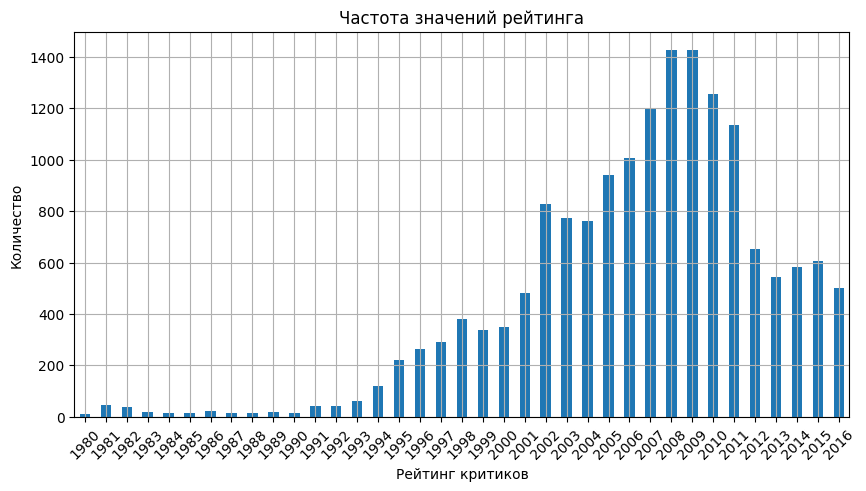

In [31]:
# построим столбчатую диаграмму количества выпущенных игр по годам
data['year_of_release'].value_counts().sort_index().plot.bar(figsize=(10, 5), rot=45)
plt.grid(True)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Количество')
plt.title('Частота значений рейтинга')

*Вывод 3.1*

Игры выпускались с 1980 по 2016 год. На начальном этапе продажи составляли порядка 10-20 млн продаж в год.

Ощутимый рост популярности игр начался в середине 90-х, пик же пришелся на 2008-2009 годы и составил более 1400 млн копий продаж.

Затем, начиная с 2010 началась понижательная тенденция год к году, с небольшим ростом в 2014 и 2015 годах. 

По состояния на 2016 год продажи составили порядка 500 млн копий.

<a class='anchor' id='3.2-bullet'></a>
### Исследование разницы количества продаж по платформам

In [32]:
# создадим датафрейм "data_platforms" с данными о платформах
data_platforms = data.groupby('platform').agg({'sales': 'sum'})

Text(0.5, 1.0, 'Количество проданных копий по платформам, млн')

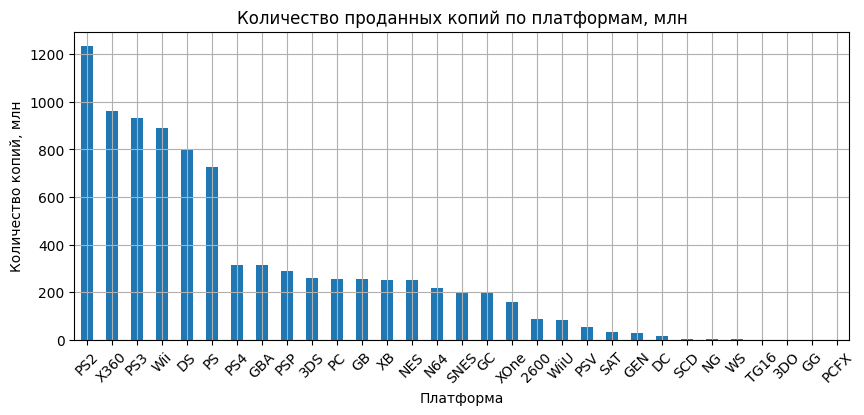

In [33]:
# построим столбчатую диаграмму
data_platforms['sales'].sort_values(ascending=False).plot.bar(figsize=(10, 4), rot=45)
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн')
plt.title('Количество проданных копий по платформам, млн')

Явно выделяется помежуток от *"PS2" до "PS"*, на котором количество копий превышает 700 млн продаж. Возьмем первые 5 платформ, количество продаж которых перевалило за 800 миллионов копий.

Text(0.5, 1.0, 'Количество проданных копий PS2, млн')

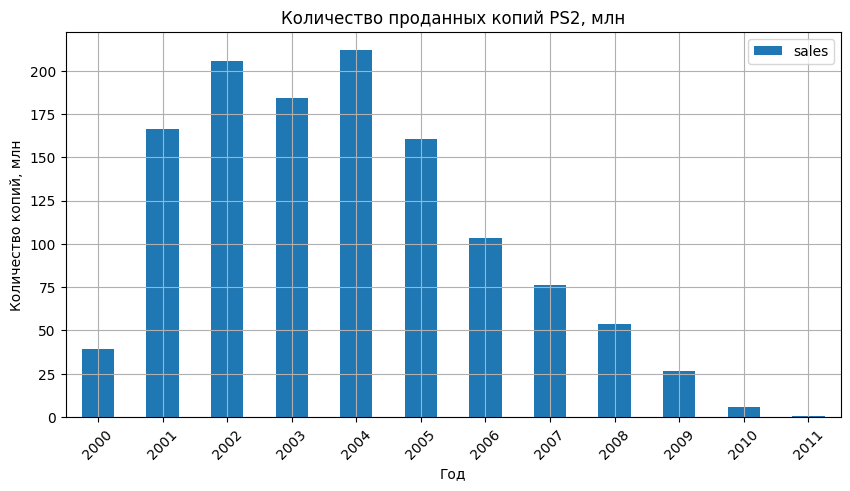

In [34]:
# построим столбчатую диаграмму платформы "PS2"
data[data['platform'] == "PS2"].groupby('year_of_release').agg({'sales': 'sum'}).plot.bar(figsize=(10, 5), rot=45)
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Количество копий, млн')
plt.title('Количество проданных копий PS2, млн')

Text(0.5, 1.0, 'Количество проданных копий X360, млн')

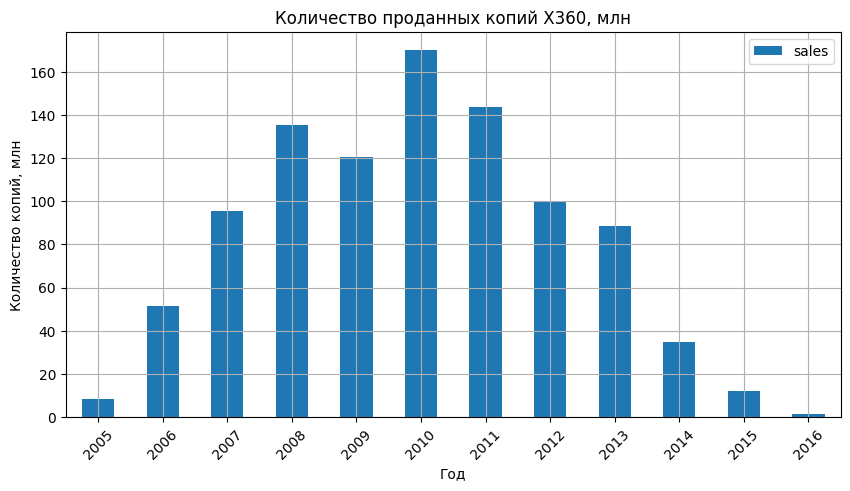

In [35]:
# построим столбчатую диаграмму платформы "X360"
data[data['platform'] == "X360"].groupby('year_of_release').agg({'sales': 'sum'}).plot.bar(figsize=(10, 5), rot=45)
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Количество копий, млн')
plt.title('Количество проданных копий X360, млн')

Text(0.5, 1.0, 'Количество проданных копий PS3, млн')

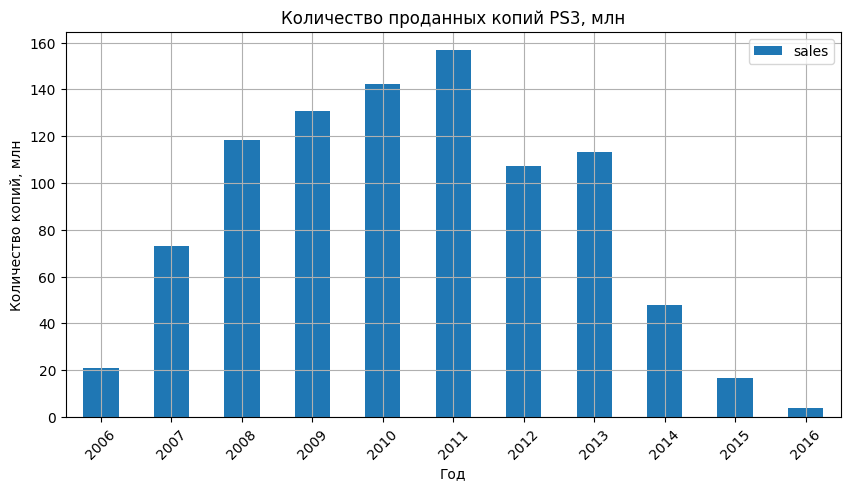

In [36]:
# построим столбчатую диаграмму платформы "PS3"
data[data['platform'] == "PS3"].groupby('year_of_release').agg({'sales': 'sum'}).plot.bar(figsize=(10, 5), rot=45)
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Количество копий, млн')
plt.title('Количество проданных копий PS3, млн')

Text(0.5, 1.0, 'Количество проданных копий Wii, млн')

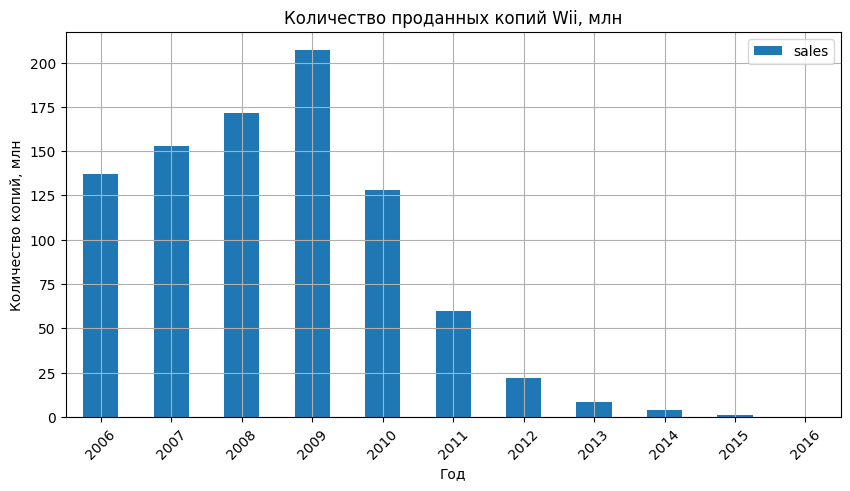

In [37]:
# построим столбчатую диаграмму платформы "Wii"
data[data['platform'] == "Wii"].groupby('year_of_release').agg({'sales': 'sum'}).plot.bar(figsize=(10, 5), rot=45)
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Количество копий, млн')
plt.title('Количество проданных копий Wii, млн')

Text(0.5, 1.0, 'Количество проданных копий DS, млн')

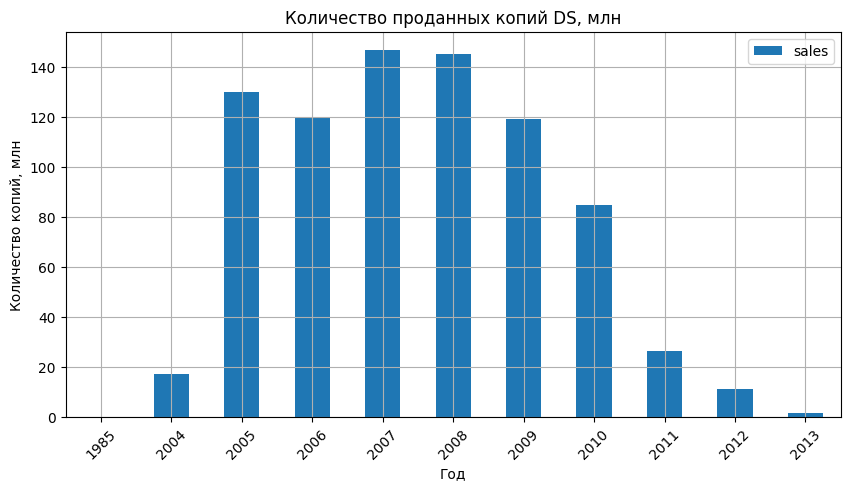

In [38]:
# построим столбчатую диаграмму платформы "DS"
data[data['platform'] == "DS"].groupby('year_of_release').agg({'sales': 'sum'}).plot.bar(figsize=(10, 5), rot=45)
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Количество копий, млн')
plt.title('Количество проданных копий DS, млн')

Text(0.5, 1.0, 'Количество проданных копий PS2, млн')

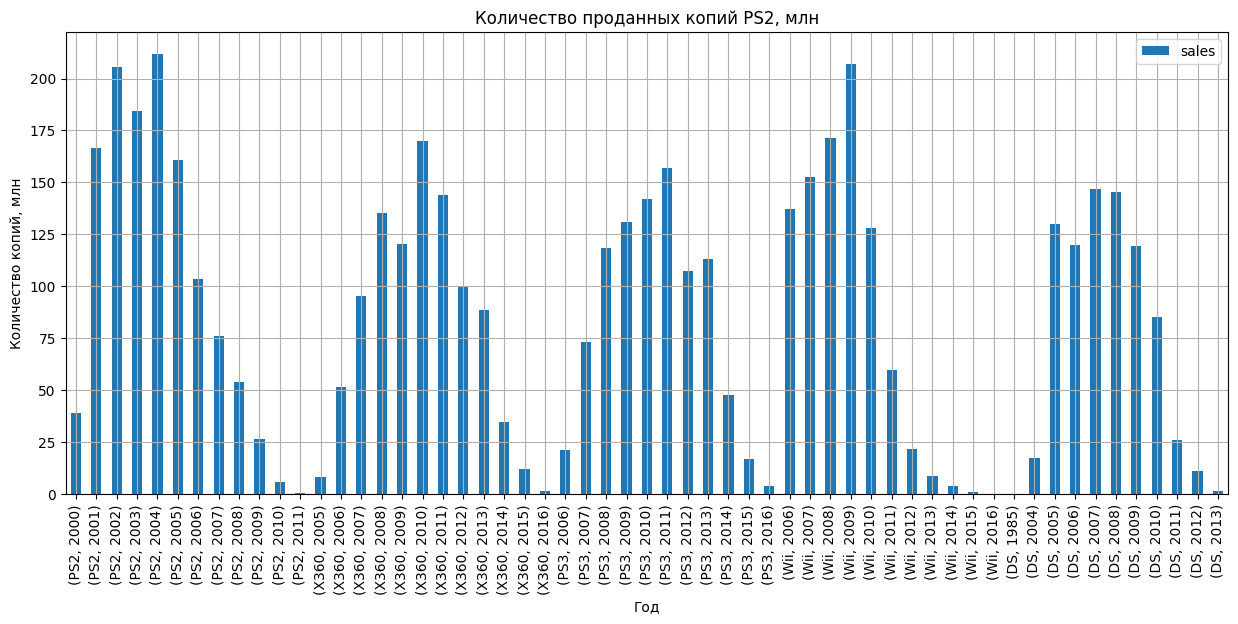

In [39]:
# создадим датафрейм с платформами
dat = data.pivot_table(index=['platform', 'year_of_release'], values='sales', aggfunc='sum').sort_index()

# выведем общий столбчатый график для самых популярных платформ
dat.loc[['PS2', 'X360', 'PS3', 'Wii', 'DS'], :].plot.bar(figsize=(15, 6))
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Количество копий, млн')
plt.title('Количество проданных копий PS2, млн')

Построение диаграмм размаха дало понять, что жизненный период платформ ограничен 12 годами, а в среднем равен примерно 10 годам. За это время платформа успевает пройти цикл от малого количества продаж в первые 2 года, пика в периоде 3-6 лет и упадка от 7 лет и выше.

**Получается, характерным сроком жизни, за который платформы успевают появиться и исчезнуть можно взять 10 лет.**

**Определение "актуального периода"**

In [40]:
# создадим список с платформами по убыванию количества копий
platforms = list(data_platforms.sort_values(by='sales', ascending=False).index)
platforms

['PS2',
 'X360',
 'PS3',
 'Wii',
 'DS',
 'PS',
 'PS4',
 'GBA',
 'PSP',
 '3DS',
 'PC',
 'GB',
 'XB',
 'NES',
 'N64',
 'SNES',
 'GC',
 'XOne',
 '2600',
 'WiiU',
 'PSV',
 'SAT',
 'GEN',
 'DC',
 'SCD',
 'NG',
 'WS',
 'TG16',
 '3DO',
 'GG',
 'PCFX']

Text(0.5, 1.0, 'Частота значений рейтинга')

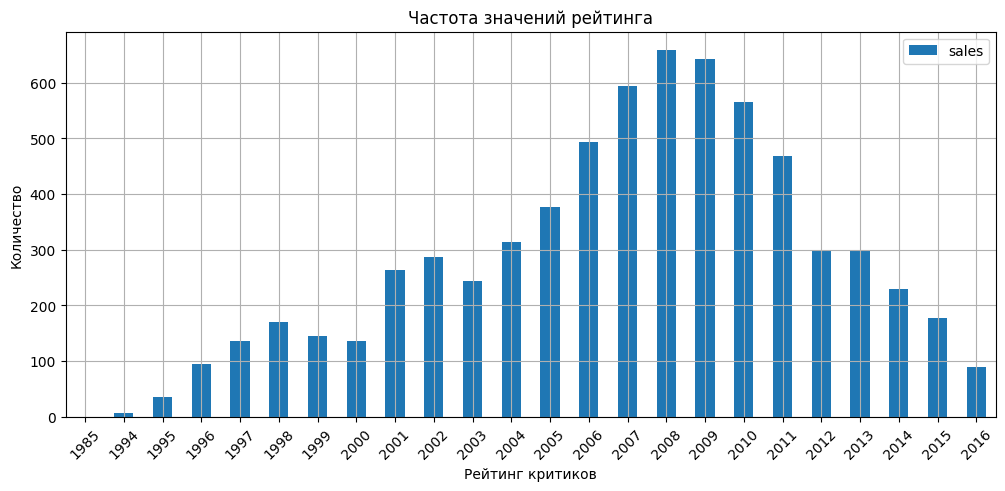

In [41]:
# создадим датафрейм "data_10" с 10 самыми крупными платформами
data_10 = data[data['platform'].isin(platforms[:10])]

# построим столбчатую диаграмму количества выпущенных игр по годам
data_10.groupby('year_of_release').agg({'sales': 'sum'}).plot.bar(figsize=(12, 5), rot=45)
plt.grid(True)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Количество')
plt.title('Частота значений рейтинга')

**Ввиду того, что мир игр стремительно меняется, для создания прогноза на 2017 год примем актуальный период равный половине "жизненного цикла", то есть равный 5 годам с 2012 года по 2016 год включительно, так как в предыдущем пункте мы определили характерный срок жизни платформы равным 10 годам. Данный период лучше всего подходит для определения актуальных платформ, а также их тенденций.**

Создадим датафрейм *"data_act"* с данными с 2012 по 2016 год включительно.

In [42]:
# создадим датафрейм "data_act"
data_act = data.query('year_of_release > 2011').reset_index(drop=True)
# выведем уникальные данные столбца "year_of_release" датафрейма "data_act"
data_act['year_of_release'].unique()
# выведем первые 5 строк
data_act.head()

C:\Users\Александр\AppData\Local\Temp\ipykernel_7200\4061888557.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data_act = data.query('year_of_release > 2011').reset_index(drop=True)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73,7.4,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,74,7.8,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


Датафрейм "data_act" создан удачно.

**Исследуем данные о платформах, присутствующих в датафрейме "data_act"**

In [ ]:
# создадим датафрейм "data_act_1" с платформами
data_act_1 = data_act.pivot_table(index=['platform', 'year_of_release'], values='sales', aggfunc='sum').sort_index()

# выведем общий столбчатый график для самых популярных платформ
data_act_1.plot.bar(figsize=(15, 6), rot=90, width=0.5)
plt.grid(True)
plt.xlabel('Год и платформа')
plt.ylabel('Количество копий, млн')
plt.title('Количество проданных копий PS2, млн')
plt.tight_layout(pad=50)

Text(0.5, 1.0, 'Количество проданных копий PS2, млн')

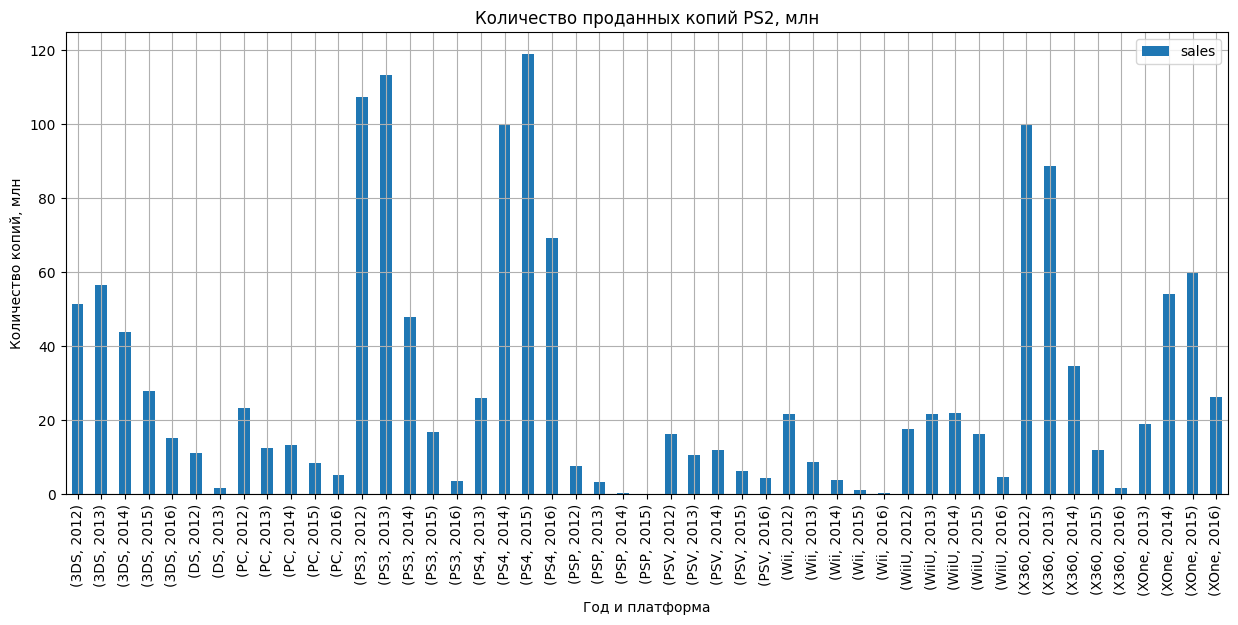

In [105]:
# создадим датафрейм "data_act_1" с платформами
data_act_1 = data_act.pivot_table(index=['platform', 'year_of_release'], values='sales', aggfunc='sum').sort_index()

# выведем общий столбчатый график для самых популярных платформ
data_act_1.plot.bar(figsize=(15, 6), rot=90, width=0.5)
plt.grid(True)
plt.xlabel('Год и платформа')
plt.ylabel('Количество копий, млн')
plt.title('Количество проданных копий PS2, млн')
plt.tight_layout(pad=50)

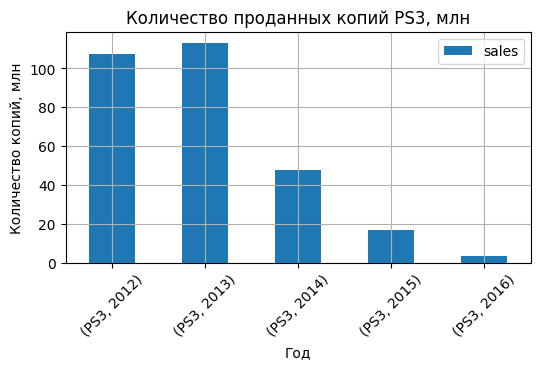

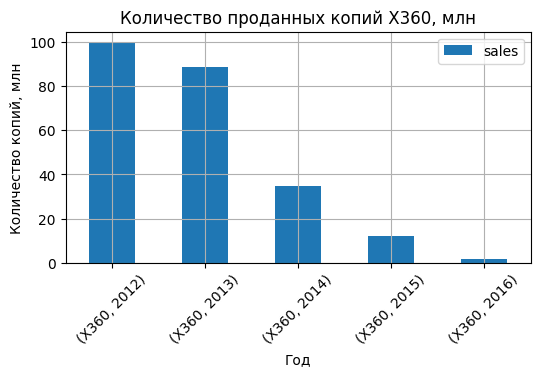

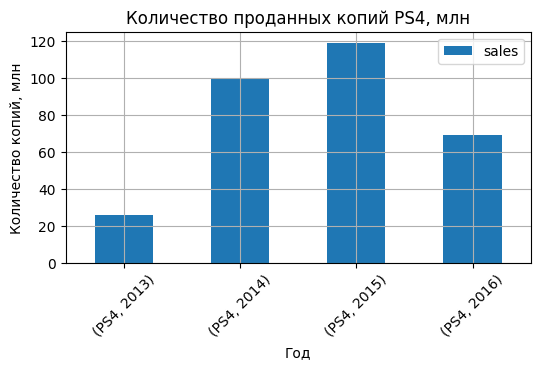

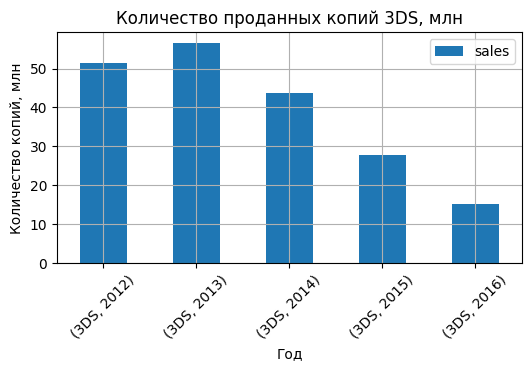

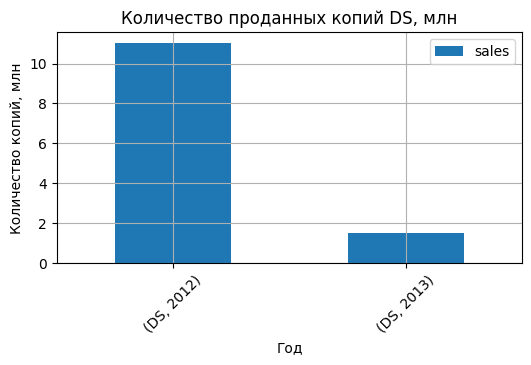

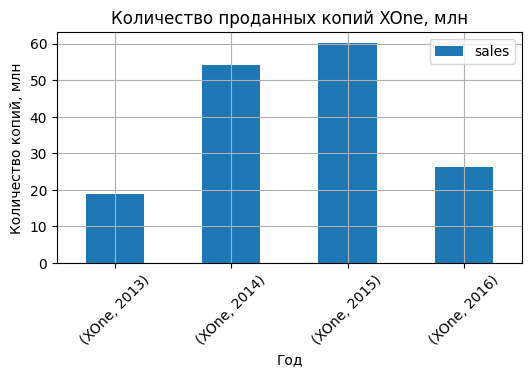

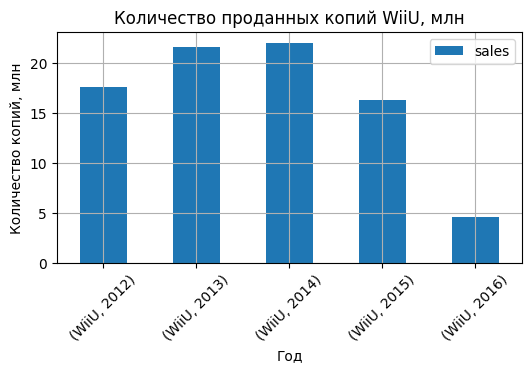

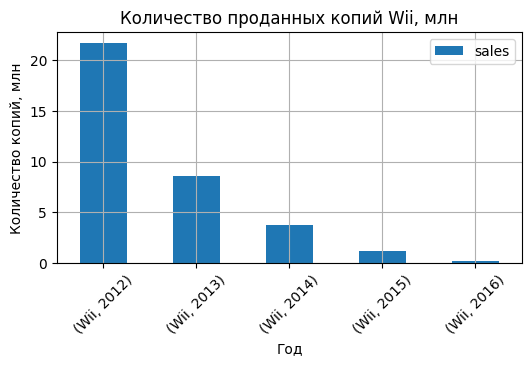

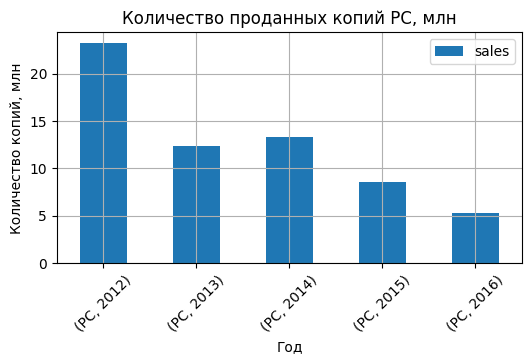

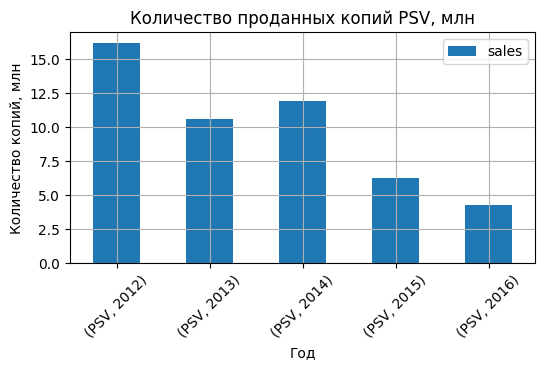

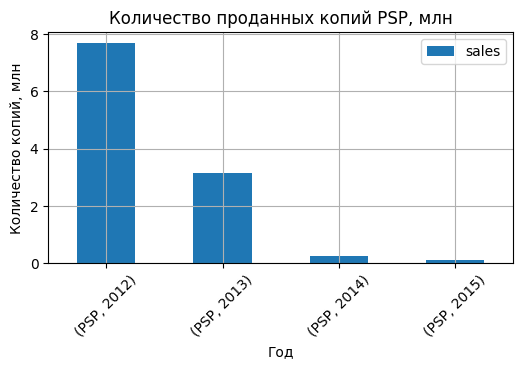

In [44]:
# теперь выведем поочередно столбчатую дтиаграмму для каждой платформы
for i in data_act['platform'].unique():
    data_act_1.query('platform == @i').plot.bar(figsize=(6, 3), rot=45)
    plt.grid(True)
    plt.xlabel('Год')
    plt.ylabel('Количество копий, млн')
    plt.title(f'Количество проданных копий {i}, млн')

*Промежуточный Вывод 3.2*

*В выбранном промежутке с 20012 до 2016 года включительно продажи осуществляли 11 платформ. По каждой платформе построены столбчатые диаграммы. Вот, что они показали:

   - *PS3* - КРУПНАЯ ПЛАТФОРМА, пик в 2013, более 100 млн продаж, которые в 2016 году превратились в менее чем в 5 млн. Пик развития пройден, тенденция понижательная. <font color='red'>*Прогноз негативный.*</font>
   - *X360* - КРУПНАЯ ПЛАТФОРМА, пик в 2012 году, составил около 100 млн. Затем показал снижение. На 2016 год количество продаж значительно меньше 5 млн. Пик развития пройден, тенденция понижательная. <font color='red'>*Прогноз негативный.*</font>
   - *PS4* - КРУПНАЯ ПЛАТФОРМА, пик в 2015 составил почти 120 млн. В 2016 году количество продаж около 70 млн. Платформа достаточно молодая, продажи, хоть и стали снижаться после пика в 2015, все равно в 2017 можно ожидать неплохие продажи, порядка 50 млн. <font color='green'>*Прогноз положительный.*</font>
   - *3DS* - СРЕДНЯЯ ПЛАТФОРМА, пик в 2013 году превысил 50 млн. Последующие годы наблюдается стабильное снижение. В 2016 году продажи порядка 15 млн. Платформа находится на закате. <font color='orange'>*Прогноз нейтральный.*</font>
   - *DS* - С 2014 года продаж не было. <font color='red'>*Прогноз негативный.*</font>
   - *XOne* - СРЕДНЯЯ ПЛАТФОРМА, пик в 2015 году чуть более 60 млн. Компания достаточно молодая. В 2016 году продажи более 25 млн. Компания может продолжить развиваться и развернуть понижательную тенденцию вспять. Даже с нынешней тенденцией можно ожидать продаж на уровне 15-20 млн. <font color='green'>*Прогноз положительный.*</font>
   - *WiiU* - МАЛЕНЬКАЯ ПЛАТФОРМА, пик в 2014 году менее 25 млн продаж. Затем снижение. В 2016 году менее 5 млн. Компания небольшая и находится на закате. <font color='red'>*Прогноз негативный.*</font>
   - *Wii* - КРУПНАЯ ПЛАТФОРМА, пик активности 2012 год, более 20 млн продаж. Далее наблюдается стремительное снижение год к году, вплоть до 2016 года, в котором продаж практически не было. Можно предоложить, что 2016 год был последним годом жизни платформы. <font color='red'>*"Жизненный" цикл данной платформы окончен, прогноз негативный.*</font>
   - *PC* - МАЛЕНЬКАЯ ПЛАТФОРМА, пик в 2012 году составил порядка 25 млн. Затем график показа снижение год к году с небольшим увеличением продаж в 2014. В 2016 году продажи еле превысили 5 млн. Платформа на закате. Хотя, даже при этом можно ожидать продаж 2-4 млн. <font color='orange'>*Прогноз нейтральный.*</font>
   - *PSV* - МАЛЕНЬКАЯ КОМПАНИЯ, пик в 2012 году превысил 16 млн. Снижение вплоть, до 2016 года (чуть более 4 млн), с небольшим отскоком в 2014. В 2017 году можно ожидать порядка 2 млн продаж. <font color='orange'>*Прогноз нейтральный.*</font>
   - *PSP* - СРЕДНЯЯ ПЛАТФОРМА, пик в 2012 году порядка 7.5 млн. Затем стремительное снижение. Последнйи год жизни - 2015. <font color='red'>*Прогноз негативный.*</font>

   
Итак, *крупными платформами*, осуществлявшими продажи с 2012 по 2016 год включительно являлись PS3, X360, PS4 и Wii. Из всех перечисленных *КРУПНЫХ платформ <font  color='green'>положительный прогноз продаж, в размере около 50 млн копий заслужил только **PS4**</font>. Платформа достаточно молодая и актуальная.*  Все же остальные платформы имеют негативный прогноз.

*Среди средних платформ*, к которым относятся 3DS, XOne и PSP, <font color='green'>*положительным прогнозом отличился только **XOne**</font>. Платформа хоть и имеет понижальную тенденцию, однако, является молодой (существует с 2013 года) и имеет шанс на рост продаж. Однако, даже с учетом понижательной тенденции можно ожидать продаж на уровне 15-20 млн.* Помимо XOne, <font color='orange'>платформа **3DS** удостоилась *нейтрального прогноза</font>. Платформа находится на закате, однако в 2017 году можно ожидать порядка 15 млн продаж.*

*Среди маленьких платформ*, к которым относятся WiiU, PC и PSV, <font color='orange'>*нейтральных прогнозов удостоились **PC** и **PSV**</font>. Платформы имеют понижательную тенденцию, однак, обе отличились повышением продаж в 2014 году. По состоянию на 2016 год имеют порядка 5 млн продаж. На 2017 год можно ожидать около 2-4 млн продаж на каждой из платформ.*

**Из 11 платформ, продававших игры с 2012 по 2016 год включительно, 2 платформы имеют положительный прогноз, то от них стоит ожидать хороших продаж в 2017 году и далее. Также нейтральный прогноз составлен по 3 платформам, от которых можно ожидать средних продаж в 2017. Доля положительных и нейтральных платформ составляет менее 50%. В целом, данное заключение коррелирует с глабальной тенденцией продаж. Так, после пика продаж в 2008 году, глобальные продажи снижаются год к году, с небольшими и немногочисленными отскоками.**

Построим диаграмму размаха для продаж по платформам.

count      31.000000
mean      284.334194
std       343.953517
min         0.030000
25%        22.150000
50%       200.040000
75%       301.205000
max      1233.560000
Name: sales, dtype: float64


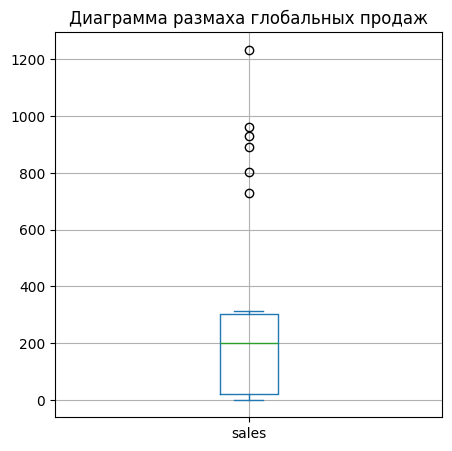

In [45]:
# выведем данные о сумме продаж для всех платформ
print(data.groupby('platform')['sales'].sum().describe())
# построим диаграмму размаха
ax = data.groupby('platform')['sales'].sum().plot.box(figsize=(5, 5), grid=True, title='Диаграмма размаха глобальных продаж')
plt.show()

*Диаграмма размаха показала, что наиболее часто встречающиеся значения лежат между 22 и 310 миллионами общих продаж. При этом выбросов всего 6, и все они превышают 700 млн продаж. Так что, нужно ставить ставку на PS4 в 2017 году!)*

**Построим "ящики с усами" для 5 актульных платформ.**

**PS4** - ожидаемые продажи в 2017 году порядка *50 млн копий*.

In [46]:
# выведем описание данных
print(data[data['platform'] == "PS4"].groupby('year_of_release').agg({'sales': 'sum'}).describe())

            sales
count    4.000000
mean    78.535000
std     40.567917
min     25.990000
25%     58.435000
50%     84.625000
75%    104.725000
max    118.900000


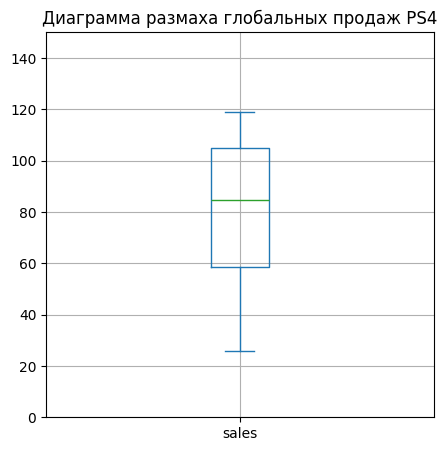

In [47]:
# построим яик с усами для PS4
data[data['platform'] == "PS4"].groupby('year_of_release').agg({'sales': 'sum'}).plot.box(figsize=(5, 5))
plt.title('Диаграмма размаха глобальных продаж PS4')
plt.grid(True)
plt.ylim(0, 150)

plt.show()

*Прогноз в 50 млн продаж на 2017 год для PS4 находится ниже среднего (78 млн), медианы (84 млн) и, даже, 1 квартиля, равного 58 млн копий. При этом данной платформе всего 4 года, что говорит о большом потенциале роста, начиная с 2017 года. Подтверждаем положительный прогноз по PS4.*

**XOne** - ожидаемые продажи в 2017 году порядка *20 млн копий*.

In [48]:
# выведем описание данных
print(data[data['platform'] == "XOne"].groupby('year_of_release').agg({'sales': 'sum'}).describe())

           sales
count   4.000000
mean   39.830000
std    20.313977
min    18.960000
25%    24.352500
50%    40.110000
75%    55.587500
max    60.140000


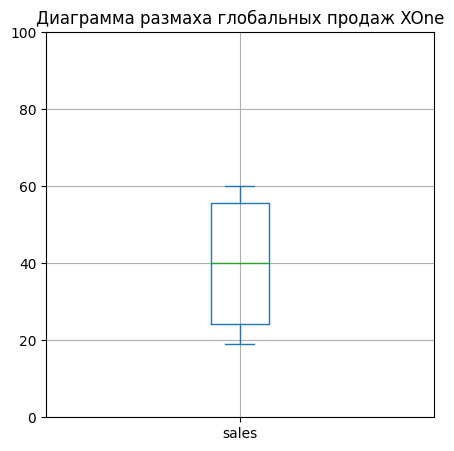

In [49]:
# построим яик с усами для XOne
data[data['platform'] == "XOne"].groupby('year_of_release').agg({'sales': 'sum'}).plot.box(figsize=(5, 5))
plt.title('Диаграмма размаха глобальных продаж XOne')
plt.grid(True)
plt.ylim(0, 100)

plt.show()

*Прогноз в 20 млн продаж на 2017 год для XOne находится ниже среднего (39 млн), медианы (40 млн) и, даже, 1 квартиля, равного 24 млн копий. При этом данной платформе всего 4 года, что говорит о большом потенциале роста, начиная с 2017 года. Подтверждаем положительный прогноз по XOne.*

**3DS** - ожидаемые продажи в 2017 году порядка *15 млн копий*.

In [50]:
# выведем описание данных
print(data[data['platform'] == "3DS"].groupby('year_of_release').agg({'sales': 'sum'}).describe())

           sales
count   6.000000
mean   42.968333
std    18.278261
min    15.140000
25%    31.775000
50%    47.560000
75%    55.267500
max    63.200000


(0.0, 80.0)

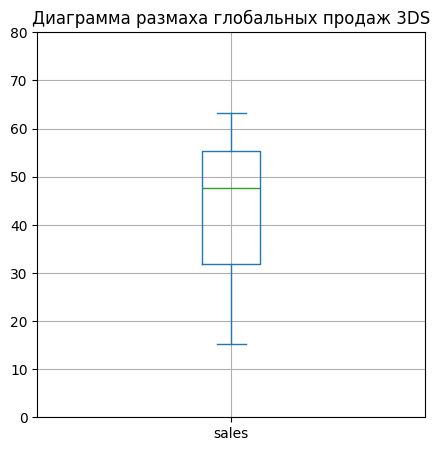

In [51]:
# построим яик с усами для 3DS
data[data['platform'] == "3DS"].groupby('year_of_release').agg({'sales': 'sum'}).plot.box(figsize=(5, 5))
plt.title('Диаграмма размаха глобальных продаж 3DS')
plt.grid(True)
plt.ylim(0, 80)

*Прогноз в 15 млн продаж на 2017 год для 3DS находится ниже среднего (42 млн), медианы (47 млн) и, даже, 1 квартиля, равного 31 млн копий. При этом данной платформе уже 6 лет, что говорит о малом шансе разворота понижательной тенденции. Подтверждаем нейтральный прогноз по 3DS.*

**PC** - ожидаемые продажи в 2017 году порядка *2-4 млн копий*.

In [52]:
# выведем описание данных
print(data[data['platform'] == "PC"].groupby('year_of_release').agg({'sales': 'sum'}).describe())

           sales
count  26.000000
mean    9.836923
std     7.997666
min     0.030000
25%     4.442500
50%     8.705000
75%    12.410000
max    35.030000


(-10.0, 50.0)

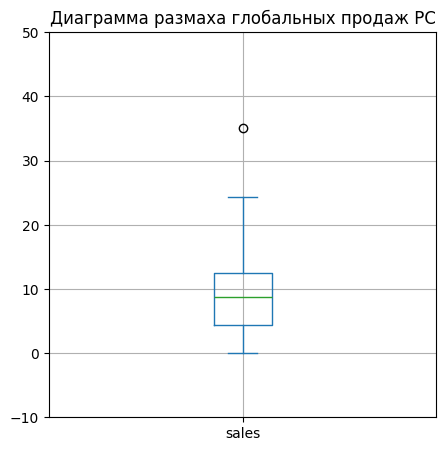

In [53]:
# построим яик с усами для PC
data[data['platform'] == "PC"].groupby('year_of_release').agg({'sales': 'sum'}).plot.box(figsize=(5, 5))
plt.title('Диаграмма размаха глобальных продаж PC')
plt.grid(True)
plt.ylim(-10, 50)

*Прогноз в 2-4 млн продаж на 2017 год для PC находится ниже среднего (8 млн), медианы (8.7 млн) и, даже, 1 квартиля, равного 4.4 млн копий. При этом данной платформе уже целых 26 лет! Настоящий долгожитель. Дополнительно построим столбчатую диаграмму.* 

Text(0.5, 1.0, 'Количество проданных копий PC, млн')

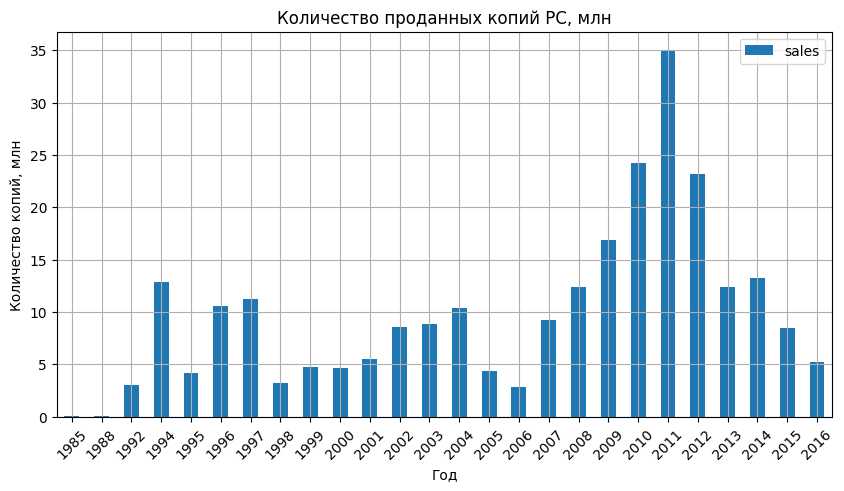

In [54]:
# построим столбчатую диаграмму платформы "PC"
data[data['platform'] == "PC"].groupby('year_of_release').agg({'sales': 'sum'}).plot.bar(figsize=(10, 5), rot=45)
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Количество копий, млн')
plt.title('Количество проданных копий PC, млн')

*От данной платформы не стоит ожидать ухода с рынка. Мы видим несколько низовых пиков, даже ниже, чем в 2016 году, после которых начинался бурный рост продаж. <font color='green'>**Изменим прогноз на УМЕРЕННО ПОЛОЖИТЕЛЬНЫЙ для PC**</font>.*

**PSV** - ожидаемые продажи в 2017 году порядка *2 млн копий*.

In [55]:
# выведем описание данных
print(data[data['platform'] == "PSV"].groupby('year_of_release').agg({'sales': 'sum'}).describe())

           sales
count   6.000000
mean    8.968333
std     4.729695
min     4.250000
25%     5.035000
50%     8.420000
75%    11.572500
max    16.190000


(0.0, 30.0)

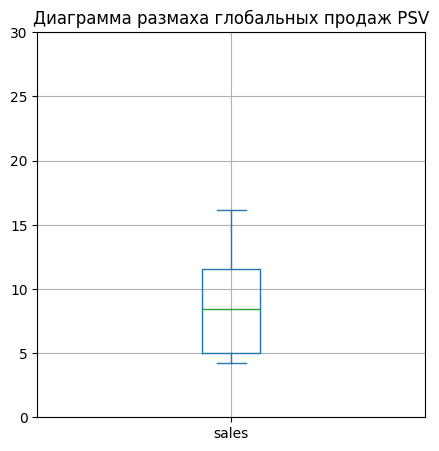

In [56]:
# построим яик с усами для PSV
data[data['platform'] == "PSV"].groupby('year_of_release').agg({'sales': 'sum'}).plot.box(figsize=(5, 5))
plt.title('Диаграмма размаха глобальных продаж PSV')
plt.grid(True)
plt.ylim(0, 30)

*Прогноз в 2 млн продаж на 2017 год для PSV находится ниже среднего (8.9 млн), медианы (8.4 млн) и, даже, 1 квартиля, равного 5 млн копий. При этом данной платформе уже 6 лет, что говорит о малом шансе разворота понижательной тенденции. Подтверждаем нейтральный прогноз по 3DS.*

**Вывод 3.2**

Итак, прогноз на 2017 и последующие годы следующий:

  - PS4 - <font color='green'>Положительный прогноз</font>. Молодая платформа (4 года). Прогноз - 50 млн продаж на 2017 год.
  - XOne - <font color='green'>Положительный прогноз</font>. Молодая платформа (4 года). Прогноз - 20 млн продаж на 2017 год.
  - 3DS - <font color='orange'>Нейтральный прогноз</font>. Устаревающая платформа (6 лет). Прогноз - 15 млн продаж на 2017 год.
  - PC - <font color='green'>Положительный прогноз</font>. Стародавняя платформа (26 лет). Прогноз изменен с "нейтрального" после проведения исследования с помощью диаграммы размаха и столбчатой диаграммы, которые показали крепость данной платформы на рынке и способность показывать сильный и уверенный рост после серьезных просадок. Ожидается не менее 2-4 млн продаж на 2017 с потенциалом роста.
  - PSV - <font color='orange'>Нейтральный прогноз</font>. Устаревающая платформа (6 лет). Прогноз - 2 млн продаж на 2017 год.

Построение диаграмм рахмаха показало, что все прогнозы лежат за пределами 1 квартиля, то есть находятся за пределами межквартильного размаха, что является не особо обнадеживающим фактом. Однако, среди актуальных платформ присутствуют молодые и крупные платформы, способные расти и развиваться, а также мастодонт игровой индустрии, существующий на рынке 26 лет и имеющие все шансы на рост.

**Проверим корреляцию между продажами и отзывами критиков и пользователей на примере PS4.**

array([[<Axes: xlabel='sales', ylabel='sales'>,
        <Axes: xlabel='critic_score', ylabel='sales'>],
       [<Axes: xlabel='sales', ylabel='critic_score'>,
        <Axes: xlabel='critic_score', ylabel='critic_score'>]],
      dtype=object)

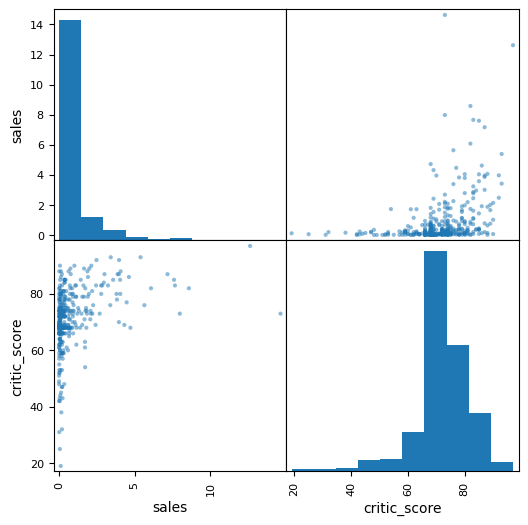

In [57]:
# построим матрицу рассеяния для "PS4"
pd.plotting.scatter_matrix(data.loc[data['platform'] == 'PS4',['sales', 'critic_score', 'user_score']], figsize=(6, 6))

<Axes: title={'center': 'Зависимость продаж PS4 от оценки критиков '}, xlabel='critic_score', ylabel='sales'>

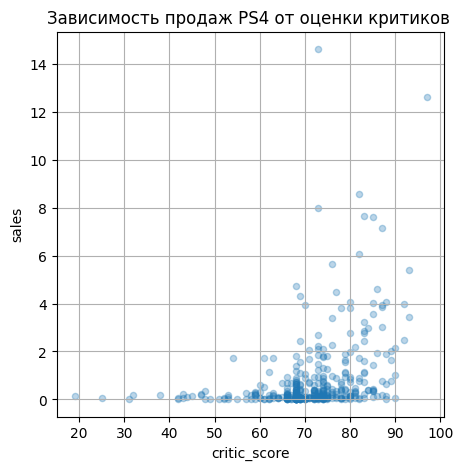

In [58]:
# построим диаграмму рассеяния зависимости продаж от оценки критика платформы PS4
data.loc[data['platform'] == 'PS4',:].plot(kind='scatter', x='critic_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж PS4 от оценки критиков ', grid=True)

<Axes: title={'center': 'Зависимость продаж PS4 от оценки пользователей'}, xlabel='user_score', ylabel='sales'>

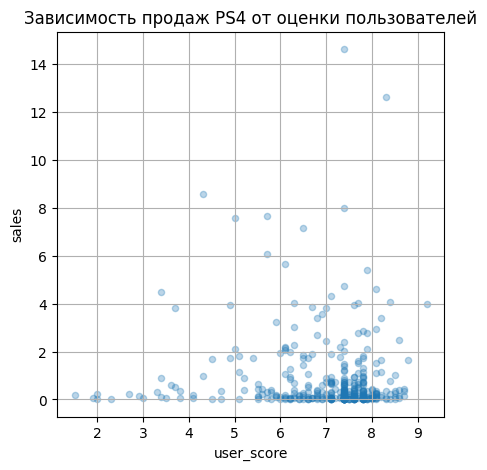

In [59]:
# построим диаграмму рассеяния зависимости продаж от оценки пользователей платформы PS4
data.loc[data['platform'] == 'PS4',:].plot(kind='scatter', x='user_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж PS4 от оценки пользователей', grid=True)

In [60]:
# выведем коэффициенты корреляции
data.loc[data['platform'] == 'PS4',['sales', 'critic_score', 'user_score']].corr()

,sales,critic_score,user_score
sales,1.000000,0.351408,-0.065482
critic_score,0.351408,1.000000,0.486751
user_score,-0.065482,0.486751,1.000000


*На платформе PS4 наблюдается практически нулевая корреляция между оценками пользователей и продажами. При этом зависимость количества продаж от оценок критиков значительно выше и равна 0.35. Данный факт подтверждают и диаграммы рассеяния.*
<br>**Получается, что оценки критиков влияют на количество продаж, в отличие от оценок пользователей.**

Проверим данное предположение на оставшихся актуальных платформах XOne, 3DS, PC и PSV, а также на самой крупной платформе PS2.

**XOne** - корреляция

<Axes: title={'center': 'Зависимость продаж XOne от оценки критиков '}, xlabel='critic_score', ylabel='sales'>

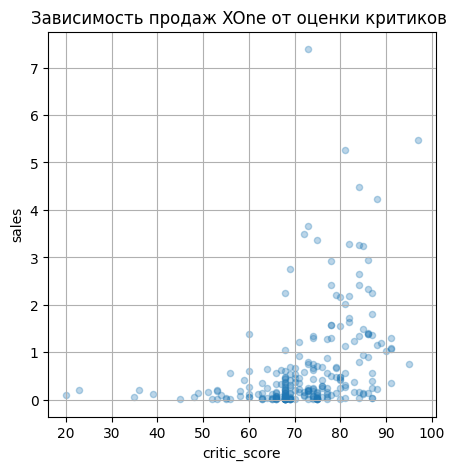

In [61]:
# построим диаграмму рассеяния зависимости продаж от оценки критика платформы XOne
data.loc[data['platform'] == 'XOne',:].plot(kind='scatter', x='critic_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж XOne от оценки критиков ', grid=True)

<Axes: title={'center': 'Зависимость продаж XOne от оценки пользователей'}, xlabel='user_score', ylabel='sales'>

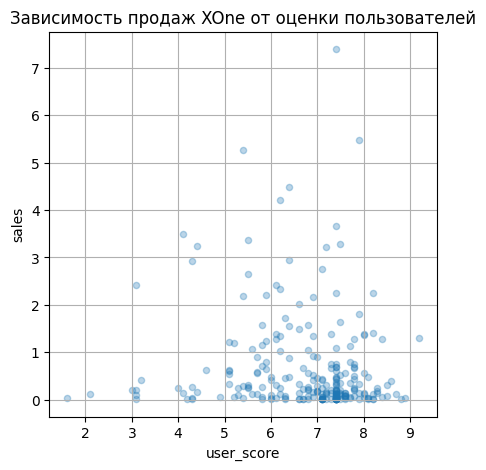

In [62]:
# построим диаграмму рассеяния зависимости продаж от оценки пользователей платформы XOne
data.loc[data['platform'] == 'XOne',:].plot(kind='scatter', x='user_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж XOne от оценки пользователей', grid=True)

In [63]:
# выведем коэффициенты корреляции
data.loc[data['platform'] == 'XOne',['sales', 'critic_score', 'user_score']].corr()

,sales,critic_score,user_score
sales,1.000000,0.378658,-0.105157
critic_score,0.378658,1.000000,0.344680
user_score,-0.105157,0.344680,1.000000


**3DS** - корреляция

<Axes: title={'center': 'Зависимость продаж 3DS от оценки критиков '}, xlabel='critic_score', ylabel='sales'>

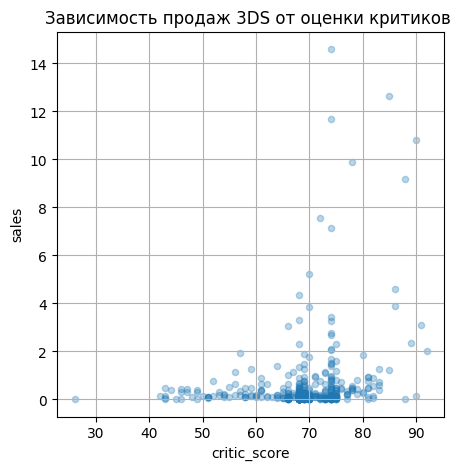

In [64]:
# построим диаграмму рассеяния зависимости продаж от оценки критика платформы 3DS
data.loc[data['platform'] == '3DS',:].plot(kind='scatter', x='critic_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж 3DS от оценки критиков ', grid=True)

<Axes: title={'center': 'Зависимость продаж 3DS от оценки пользователей'}, xlabel='user_score', ylabel='sales'>

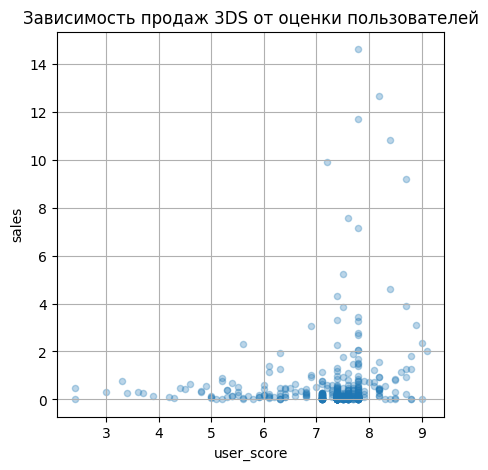

In [65]:
# построим диаграмму рассеяния зависимости продаж от оценки пользователей платформы 3DS
data.loc[data['platform'] == '3DS',:].plot(kind='scatter', x='user_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж 3DS от оценки пользователей', grid=True)

In [66]:
# выведем коэффициенты корреляции
data.loc[data['platform'] == '3DS',['sales', 'critic_score', 'user_score']].corr()

,sales,critic_score,user_score
sales,1.000000,0.242157,0.126755
critic_score,0.242157,1.000000,0.599016
user_score,0.126755,0.599016,1.000000


**PC** - корреляция

<Axes: title={'center': 'Зависимость продаж PC от оценки критиков '}, xlabel='critic_score', ylabel='sales'>

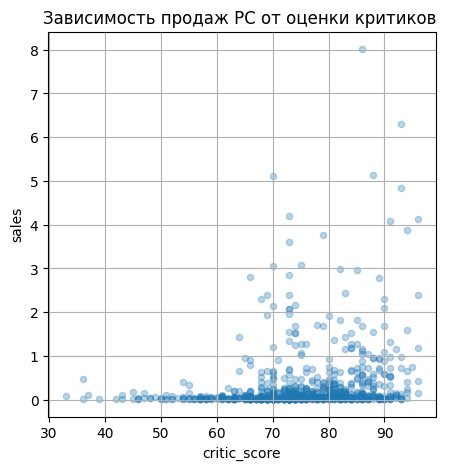

In [67]:
# построим диаграмму рассеяния зависимости продаж от оценки критика платформы PC
data.loc[data['platform'] == 'PC',:].plot(kind='scatter', x='critic_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж PC от оценки критиков ', grid=True)

<Axes: title={'center': 'Зависимость продаж PC от оценки пользователей'}, xlabel='user_score', ylabel='sales'>

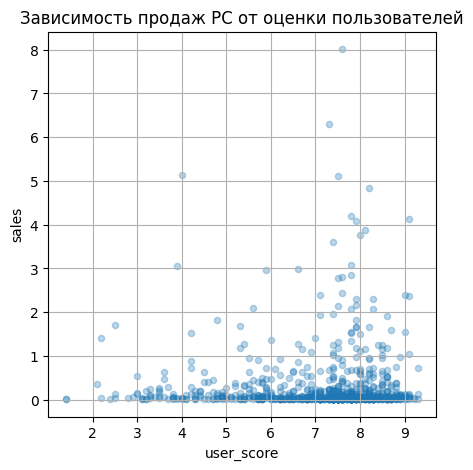

In [68]:
# построим диаграмму рассеяния зависимости продаж от оценки пользователей платформы PC
data.loc[data['platform'] == 'PC',:].plot(kind='scatter', x='user_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж PC от оценки пользователей', grid=True)

In [69]:
# выведем коэффициенты корреляции
data.loc[data['platform'] == 'PC',['sales', 'critic_score', 'user_score']].corr()

,sales,critic_score,user_score
sales,1.000000,0.222871,0.011116
critic_score,0.222871,1.000000,0.466923
user_score,0.011116,0.466923,1.000000


**PSV** - корреляция

<Axes: title={'center': 'Зависимость продаж PSV от оценки критиков '}, xlabel='critic_score', ylabel='sales'>

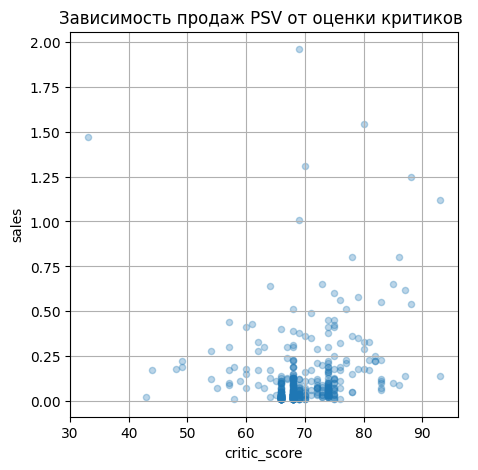

In [70]:
# построим диаграмму рассеяния зависимости продаж от оценки критика платформы PSV
data.loc[data['platform'] == 'PSV',:].plot(kind='scatter', x='critic_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж PSV от оценки критиков ', grid=True)

<Axes: title={'center': 'Зависимость продаж PSV от оценки пользователей'}, xlabel='user_score', ylabel='sales'>

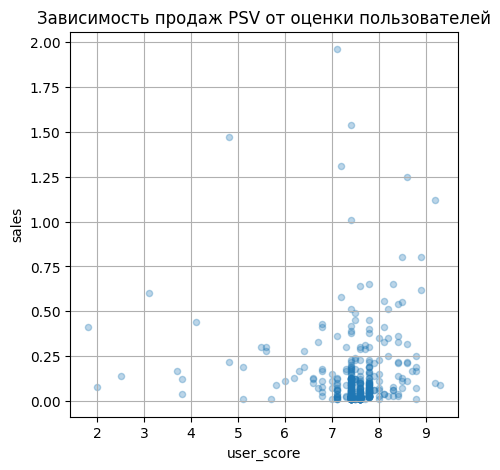

In [71]:
# построим диаграмму рассеяния зависимости продаж от оценки пользователей платформы PSV
data.loc[data['platform'] == 'PSV',:].plot(kind='scatter', x='user_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж PSV от оценки пользователей', grid=True)

In [72]:
# выведем коэффициенты корреляции
data.loc[data['platform'] == 'PSV',['sales', 'critic_score', 'user_score']].corr()

,sales,critic_score,user_score
sales,1.000000,0.166688,-0.042626
critic_score,0.166688,1.000000,0.460802
user_score,-0.042626,0.460802,1.000000


**PS2** - корреляция

<Axes: title={'center': 'Зависимость продаж PS2 от оценки критиков '}, xlabel='critic_score', ylabel='sales'>

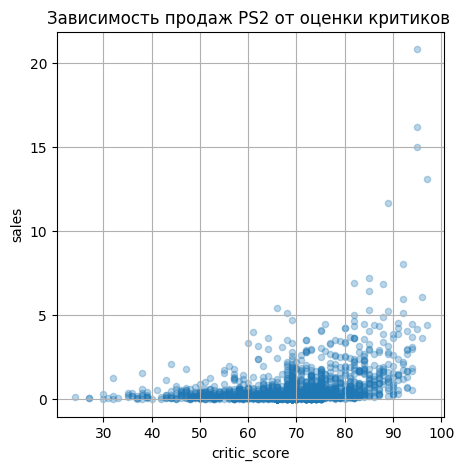

In [73]:
# построим диаграмму рассеяния зависимости продаж от оценки критика платформы PS2
data.loc[data['platform'] == 'PS2',:].plot(kind='scatter', x='critic_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж PS2 от оценки критиков ', grid=True)

<Axes: title={'center': 'Зависимость продаж PS2 от оценки пользователей'}, xlabel='user_score', ylabel='sales'>

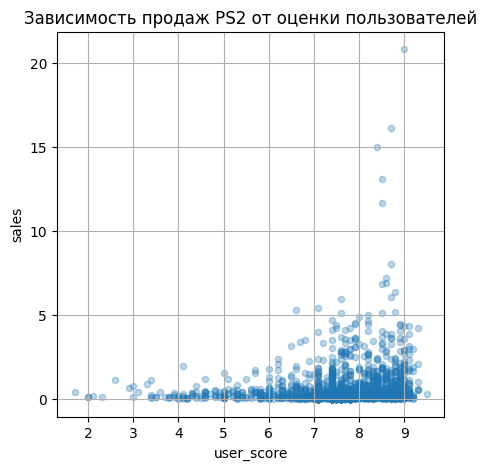

In [74]:
# построим диаграмму рассеяния зависимости продаж от оценки пользователей платформы PS2
data.loc[data['platform'] == 'PS2',:].plot(kind='scatter', x='user_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж PS2 от оценки пользователей', grid=True)

In [75]:
# выведем коэффициенты корреляции
data.loc[data['platform'] == 'PS2',['sales', 'critic_score', 'user_score']].corr()

,sales,critic_score,user_score
sales,1.000000,0.350021,0.176364
critic_score,0.350021,1.000000,0.502580
user_score,0.176364,0.502580,1.000000


<Axes: title={'center': 'Зависимость продаж от оценки пользователей'}, xlabel='user_score', ylabel='sales'>

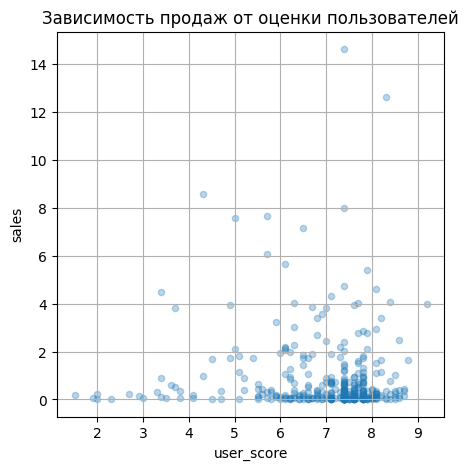

In [76]:
# построим диаграмму рассеяния зависимости продаж от оценки пользователей платформы PS4
data.loc[data['platform'] == 'PS4',:].plot(kind='scatter', x='user_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж от оценки пользователей', grid=True)

In [77]:
# выведем коэффициенты корреляции XB
data.loc[data['platform'] == 'XB',['sales', 'critic_score', 'user_score']].corr()

,sales,critic_score,user_score
sales,1.000000,0.366131,0.168066
critic_score,0.366131,1.000000,0.520177
user_score,0.168066,0.520177,1.000000


<Axes: title={'center': 'Зависимость продаж от оценки критиков'}, xlabel='critic_score', ylabel='sales'>

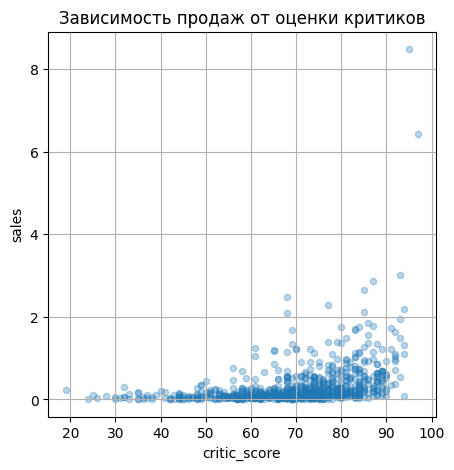

In [78]:
# построим диаграмму рассеяния зависимости продаж от оценки критика платформы XB
data.loc[data['platform'] == 'XB',:].plot(kind='scatter', x='critic_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж от оценки критиков', grid=True)

<Axes: title={'center': 'Зависимость продаж от оценки пользователей'}, xlabel='user_score', ylabel='sales'>

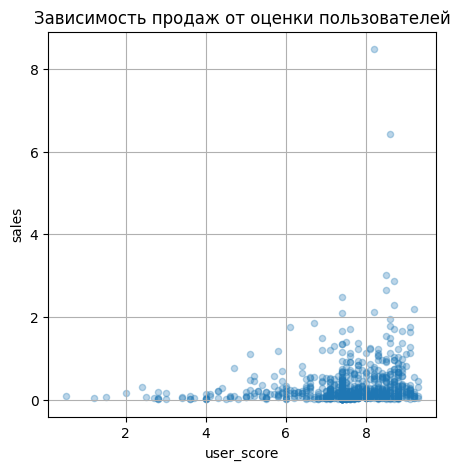

In [79]:
# построим диаграмму рассеяния зависимости продаж от оценки пользователей платформы XB
data.loc[data['platform'] == 'XB',:].plot(kind='scatter', x='user_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж от оценки пользователей', grid=True)

In [80]:
# выведем коэффициенты корреляции Wii
data.loc[data['platform'] == 'GC',['sales', 'critic_score', 'user_score']].corr()

,sales,critic_score,user_score
sales,1.000000,0.279254,0.208772
critic_score,0.279254,1.000000,0.576533
user_score,0.208772,0.576533,1.000000


<Axes: title={'center': 'Зависимость продаж от оценки критиков'}, xlabel='critic_score', ylabel='sales'>

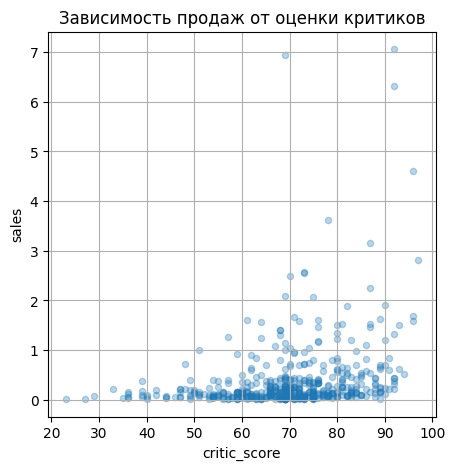

In [81]:
# построим диаграмму рассеяния зависимости продаж от оценки критика платформы GC
data.loc[data['platform'] == 'GC',:].plot(kind='scatter', x='critic_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж от оценки критиков', grid=True)

<Axes: title={'center': 'Зависимость продаж от оценки пользователей'}, xlabel='user_score', ylabel='sales'>

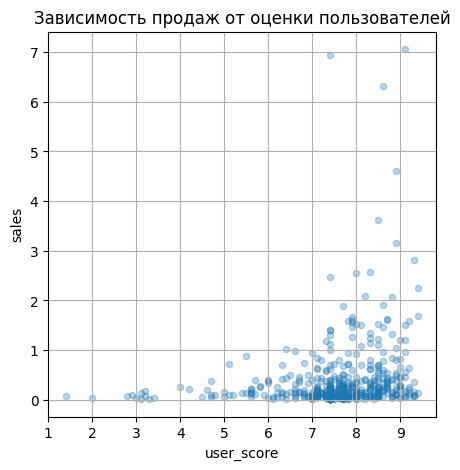

In [82]:
# построим диаграмму рассеяния зависимости продаж от оценки пользователей платформы GC
data.loc[data['platform'] == 'GC',:].plot(kind='scatter', x='user_score', y='sales', alpha=0.3, figsize=(5, 5), title='Зависимость продаж от оценки пользователей', grid=True)

**Вывод по корреляции**

Проведя исследование о корреляции между оценками критиков и количеством продаж на основе самой актульной платформы PS4 было выдвинуто предположение, *что оценки критиков имеют влияение на продажи в отличие от оценок пользователей (кф корреляции 0.35 против -0.03).* Знак минуса учитывать не стоит, так как данное число очень близко к нулю, значит, корреляция отсутствует. 

Данное предположение было проверено на оставшихся четырех популярных платформах (XOne, 3DS, PC и PSV), а также на платформе с самым большим общим количеством продаж - PS2. 
<br>Проверка доказала, что влияние оценки критиков значительно больше, чем оценок пользователей, однако, влияние мнения пользователей также имеет влияние на количество продаж на таких платформах, как 3DS (0.12) и PS2 (0.17). 
<br>При этом самое большое влияние оценки критиков оказывают на продажи платформы 3DS (целых 0.37), а самое маленькое на PSV (всего 0.16). 

**Из всего выше сказанного можно сделать вывод, что не стоит недооценивать влияние ни оценок критиков, ни оценок пользователей, однако, все же большее внимание стоит уделить получению высоких оценок именно от критиков. Им люди доверяют больше, поэтому и покупают игры охотнее с высоким рейтингом от профессионалов.**

<a class='anchor' id='3.3-bullet'></a>
### Исследование продаж по жанрам.

**Исследуем общие продажи по жанрам**

count      12.000000
mean      734.530000
std       472.550065
min       172.570000
25%       350.942500
50%       756.890000
75%       958.650000
max      1716.520000
Name: sales, dtype: float64


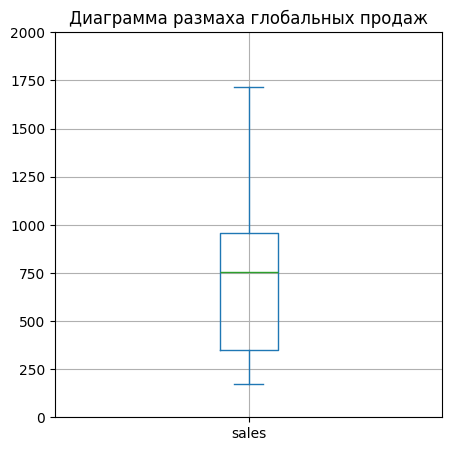

In [83]:
# опишем данные о продажах по жанрам
print(data.groupby('genre')['sales'].sum().describe())
# построим диаграмму размаха продаж по жанрам
data.groupby('genre')['sales'].sum().plot.box(figsize=(5, 5), grid=True, title='Диаграмма размаха глобальных продаж')
plt.ylim(0, 2000)
plt.show()

Text(0.5, 1.0, 'Диаграмма общих продаж по жанрам.')

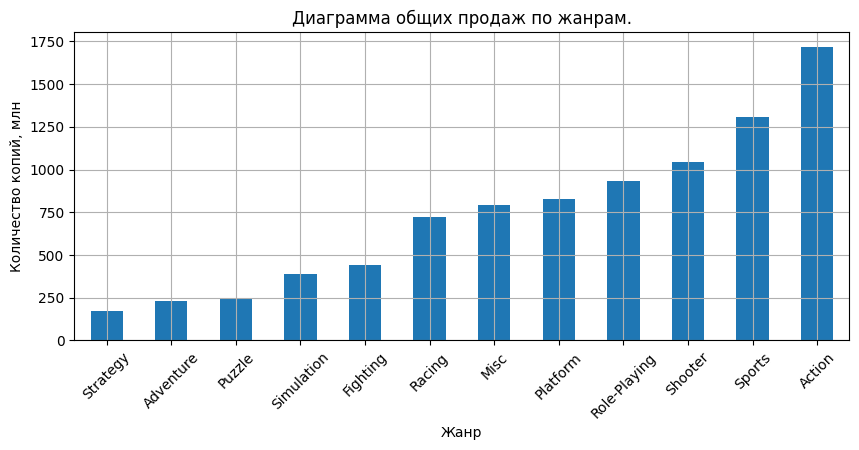

In [84]:
data.groupby('genre')['sales'].sum().sort_values().plot.bar(figsize=(10, 4), rot=45)
plt.grid(True)
plt.xlabel('Жанр')
plt.ylabel('Количество копий, млн')
plt.title('Диаграмма общих продаж по жанрам.')

**Исследуем медианные продажи по каждому жанру**

count    12.000000
mean      0.171667
std       0.063652
min       0.050000
25%       0.137500
50%       0.185000
75%       0.212500
max       0.270000
Name: sales, dtype: float64


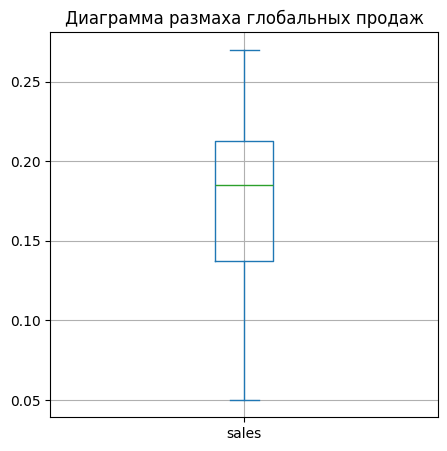

In [85]:
# опишем данные о продажах по жанрам
print(data.groupby('genre')['sales'].median().describe())
# построим диаграмму размаха продаж по жанрам
data.groupby('genre')['sales'].median().plot.box(figsize=(5, 5), grid=True, title='Диаграмма размаха глобальных продаж')
plt.show()

Text(0.5, 1.0, 'Диаграмма медиан продаж по жанрам.')

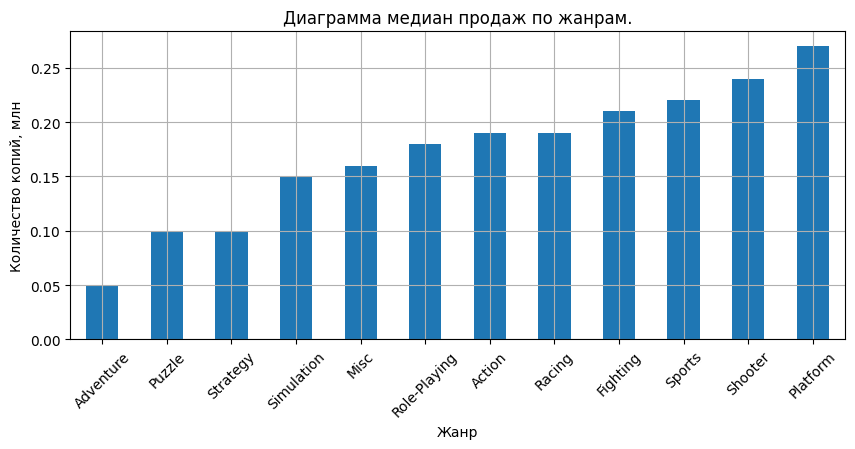

In [86]:
data.groupby('genre')['sales'].median().sort_values().plot.bar(figsize=(10, 4), rot=45)
plt.grid(True)
plt.xlabel('Жанр')
plt.ylabel('Количество копий, млн')
plt.title('Диаграмма медиан продаж по жанрам.')

**Вывод 3.3**

Первоначальное исследование успешности продаж игр различных жанров по общему количеству продаж и исследование по медианам показывают разные картины прибыльности тех, или иных жанров. 

Доверимся медианным значениям, так как медиана более точно покажет характерное значение прибыли каждого жанра, а также лишена влияния выбросов, в отличие от среднего.

Итак, согласно диаграмме размаха, на которой отсутствуют выбросы, **средними значением** количества продаж являются продажи от 0.1375 до 0.2125 млн копий. К данной категории относятся следующие жанры:

   - Simulation (0.15 млн);
   - Misc (0.16 млн);
   - Role-Playing (0.17 млн);
   - Action (0.18 млн);
   - Racing (0.18 млн).
   
К **особо прибыльным жанрам** относятся следующие жанры:

   - Fighting (0.215 млн);
   - Sports (0.22 млн);
   - Shooter (0.24 млн);
   - Platform (0.27 млн).
   
К **НЕ прибыльным жанрам** относятся следующие жанры:

   - Strategy (0.10 млн);
   - Puzzle (0.10 млн);
   - Adventure (0.05 млн).
   
В данном исследование мы нашли ответ, какого жанра игру выгоднее всего продавать.

**Вывод 3**

В данном пункте было проведено исследование продаж по годам, платформам и жанрам.

1. Исследование продаж по годам.

   Игры выпускались с 1980 по 2016 год. На начальном этапе продажи составляли порядка 10-20 млн продаж в год.
   Ощутимый рост популярности игр начался в середине 90-х, пик же пришелся 2008-2009 годы и составил более 1400 млн копий продаж.
   Затем, начиная с 2010 началась понижательная тенденция год к году, с небольшим росто в 2014 и 2015 годах. 
   По состояния на 2016 год продажи составили порядка 500 млн копий.
   
   
2. Исследование по платформам.

   Исследование по платфмормам показало, что средний срок "жизни" платформы составляет поряка 10 лет. За это время платформа выходит на рынок, развивается, а затем уходит в небытие.
  
   Анализ платформ с помощью в период с 2012 по 2016 год включительно позволили сделать прогноз на 2017 год. 
   Согласно этому прогнозу, *из 11 платформ, продававших игры с 2012 по 2016 год, 3 платформы имеют положительные прогнозы продаж на 2017 год и 2 имеют нейтральные прогнозы.
   - PS4 - <font color='green'>Положительный прогноз</font>. Молодая платформа (4 года). Прогноз - 50 млн продаж на 2017 год.
   - XOne - <font color='green'>Положительный прогноз</font>. Молодая платформа (4 года). Прогноз - 20 млн продаж на 2017 год.
   - PC - <font color='green'>Положительный прогноз</font>. Стародавняя платформа (26 лет). Прогноз изменен с "нейтрального" после проведения исследования с помощью диаграммы размаха и столбчатой диаграммы, которые показали крепость данной платформы на рынке и способность показывать сильный и уверенный рост после серьезных просадок. Ожидается не менее 2-4 млн продаж на 2017 с потенциалом роста.
   - 3DS - <font color='orange'>Нейтральный прогноз</font>. Устаревающая платформа (6 года). Прогноз - 15 млн продаж на 2017 год.
   - PSV - <font color='orange'>Нейтральный прогноз</font>. Устаревающая платформа (6 года). Прогноз - 2 млн продаж на 2017 год.
   
   Доля потенциально успешных платформ (5 платформ) из общего количество актульных платформ на период с 2012 по 2016 год (11 платформ) менее 50%. При этом на каждой платформе наблюдается понижательная тенденция в актуальный период, что вполне коррелирует с глобальной ситуацией на рынке игры (с 2008 года продажи снижаются год к году, с небольшими и немногочисленными отскоками). 
   
  
3. *Исследование зависимости между продажами и оценками критиков и пользователей показало, что не стоит недооценивать влияние ни оценок критиков, ни оценок пользователей, однако, все же большее внимание стоит уделить получению высоких оценок именно от критиков. Им люди доверяют больше, поэтому и покупают игры охотнее с высоким рейтингом от профессионалов.*

Данное утверждение подкреплено графиками рассеяния и подсчету коэффициентов корреляции, построенным по 5 актуальным платформам (XOne, 3DS, PC и PSV) и платформе с самым большим количеством продаж PS2.
<br>Проверка доказала, что влияние оценки критиков значительно большее, чем от оценок пользователей, однако, влияние мнения пользователей также имеет влияние на количество продаж на таких платформах, как 3DS (0.12) и PS2 (0.17). 
<br>При этом самое больше влияние оценки критиков оказывают на продажи платформы 3DS (целых 0.37), а самое маленькое на PSV (всего 0.16). 
   
   
4. Исследование продаж по жанрам показало.
К **средними значениям** количества продаж относятся продажи от 0.1375 до 0.2125 млн копий. К данной категории относятся следующие жанры:

   - Simulation (0.15 млн);
   - Misc (0.16 млн);
   - Role-Playing (0.17 млн);
   - Action (0.18 млн);
   - Racing (0.18 млн).
   
К **особо прибыльным жанрам** относятся следующие жанры:

   - Fighting (0.215 млн);
   - Sports (0.22 млн);
   - Shooter (0.24 млн);
   - Platform (0.27 млн).
   
К **НЕ прибыльным жанрам** относятся следующие жанры:

   - Strategy (0.10 млн);
   - Puzzle (0.10 млн);
   - Adventure (0.05 млн).
   
В данном исследование мы нашли ответ, какого жанра игру выгоднее всего продавать.

<a class='anchor' id='4-bullet'></a>
## Составление портрета пользователя каждого региона

Text(0.5, 1.0, 'Диаграмма количества продаж по платформам.')

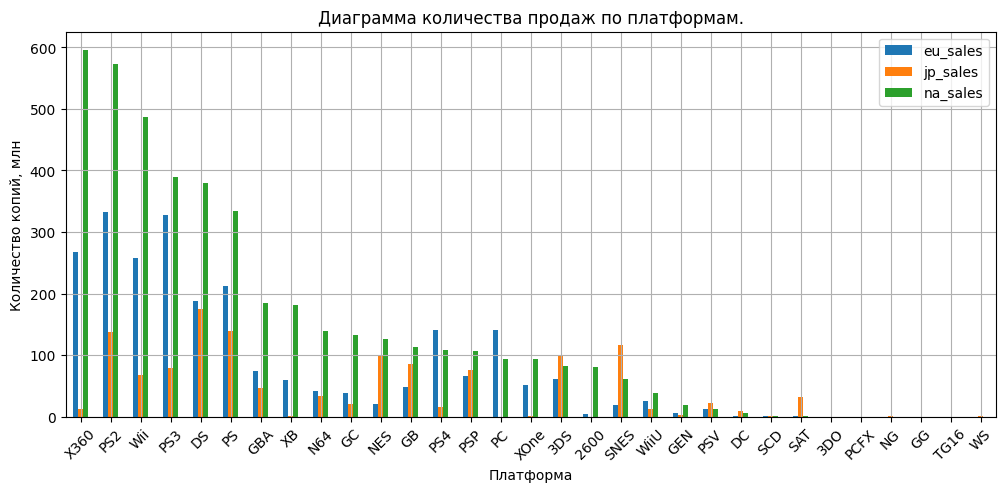

In [87]:
# создадим датафрейм data_plat
data_plat = data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
# построим общую столбчатую диаграмму
data_plat.sort_values(by='na_sales', ascending=False).plot.bar(figsize=(12, 5), rot=45, width=0.5)
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн')
plt.title('Диаграмма количества продаж по платформам.')

Text(0.5, 1.0, 'Диаграмма количества продаж по жанрам.')

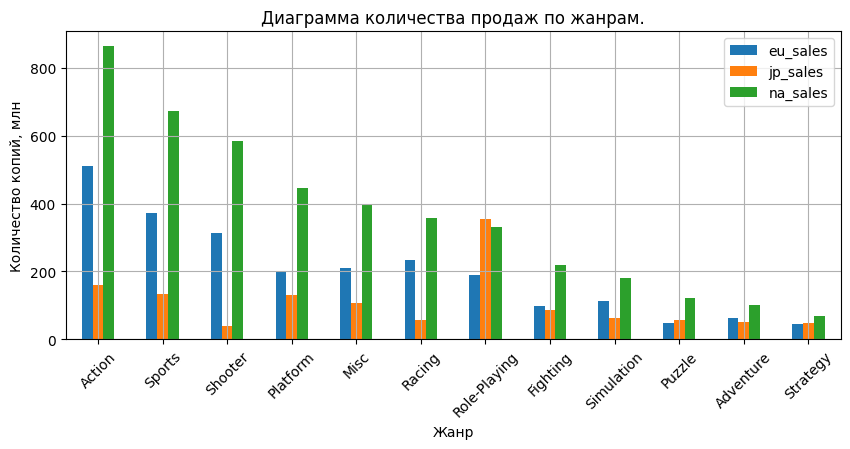

In [88]:
# создадим датафрейм data_genre
data_genre = data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
# построим общую столбчатую диаграмму
data_genre.sort_values('na_sales', ascending=False).plot.bar(figsize=(10, 4), rot=45, width=0.5)
plt.grid(True)
plt.xlabel('Жанр')
plt.ylabel('Количество копий, млн')
plt.title('Диаграмма количества продаж по жанрам.')

По построенным общим диаграммам видно, что наибольшее количество продаж приходится на регион "na_sales". При этом легко сделать вывод, что распределение по платформам и жанрам различается в каждом регионе. 

Рассмотрим каждый регион отдельно.

<a class='anchor' id='4.1-bullet'></a>
### Распределение продаж по платформам

Text(0, 0.5, 'Количество копий, млн')

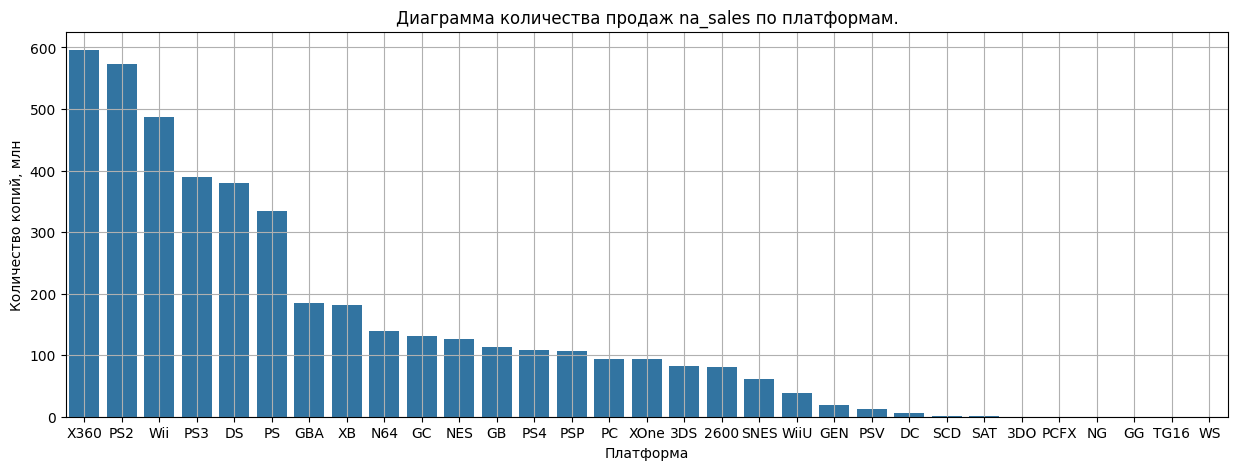

In [89]:
# отсортируем датафрейм по "na_sales"
data_plat = data_plat.sort_values('na_sales', ascending=False)

# построим диаграмму по платформам "na_sales"
sns.barplot(data=data_plat, x=data_plat.index, y='na_sales')
plt.gcf().set_size_inches(15, 5)
plt.title('Диаграмма количества продаж na_sales по платформам.')
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн')

Text(0, 0.5, 'Количество копий, млн')

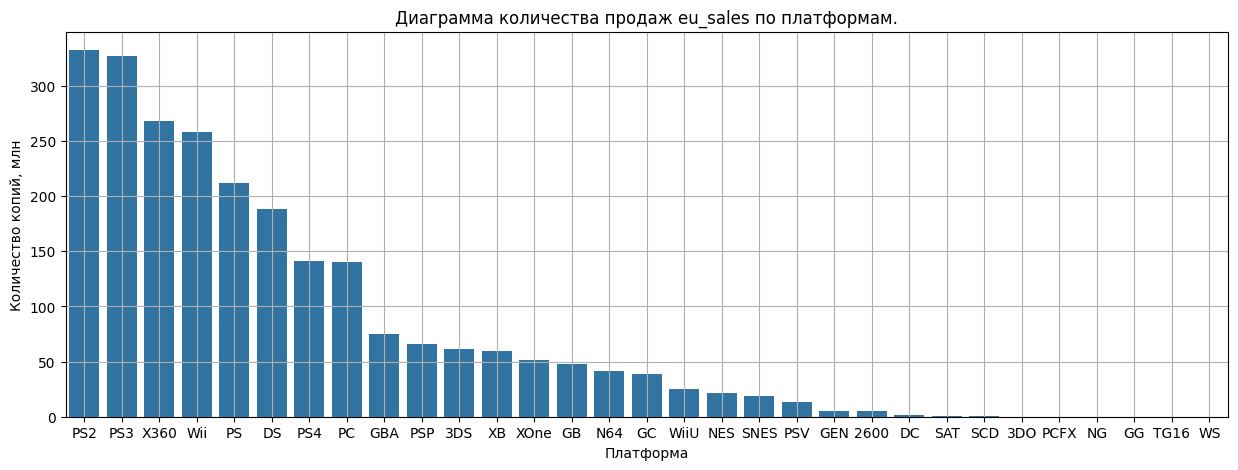

In [90]:
# отсортируем датафрейм по "eu_sales"
data_plat = data_plat.sort_values('eu_sales', ascending=False)

# построим диаграмму по платформам "eu_sales"
sns.barplot(data=data_plat, x=data_plat.index, y='eu_sales')
plt.gcf().set_size_inches(15, 5)
plt.title('Диаграмма количества продаж eu_sales по платформам.')
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн')

Text(0, 0.5, 'Количество копий, млн')

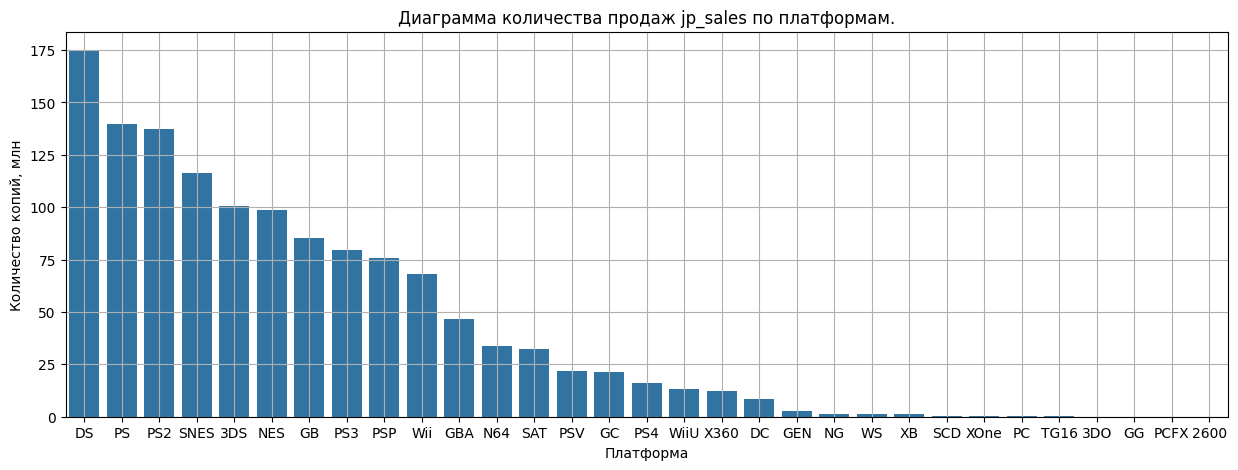

In [91]:
# отсортируем датафрейм по "jp_sales"
data_plat = data_plat.sort_values('jp_sales', ascending=False)

# построим диаграмму по платформам "jp_sales"
sns.barplot(data=data_plat, x=data_plat.index, y='jp_sales')
plt.gcf().set_size_inches(15, 5)
plt.title('Диаграмма количества продаж jp_sales по платформам.')
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн')

**Вывод по платформам 4.1**

В целом, как уже было сказано, распределение в каждом регионе разное.

 - Регион "NA". В ТОП-5 попали платформы X360 (почти 600 млн), PS2 (свыше 550 млн), Wii (почти 400 млн), PS3 (свыше 350 млн) и DS (свыше 300 млн). Данный регион продает больше всего копий.
 - Регион "EU". В ТОП-5 попали платформы PS2 (почти 350 млн), 3DO (свыше 300 млн), 3DS (свыше 250 млн), DC (свыше 250 млн) и DS (свыше 200 млн). Данный регион второй по общему количеству продаж.
 - Регион "JP". В ТОП-5 попали платформы DS (175 млн), PS (порядка 140 млн), PS2 (порядка 135 млн), SNES (порядка 115 млн) и 3DS (чуть более 100 млн). Данный регион продает меньше всего копий.
 
 
В каждом регионе есть свои любимчики. Однако, все три региона объединяет любовь к PS2. Данная платформа попала в ТОП-5 во всех 3 регионах.

<a class='anchor' id='4.2-bullet'></a>
### Распределение продаж по жанрам

Text(0, 0.5, 'Количество копий, млн')

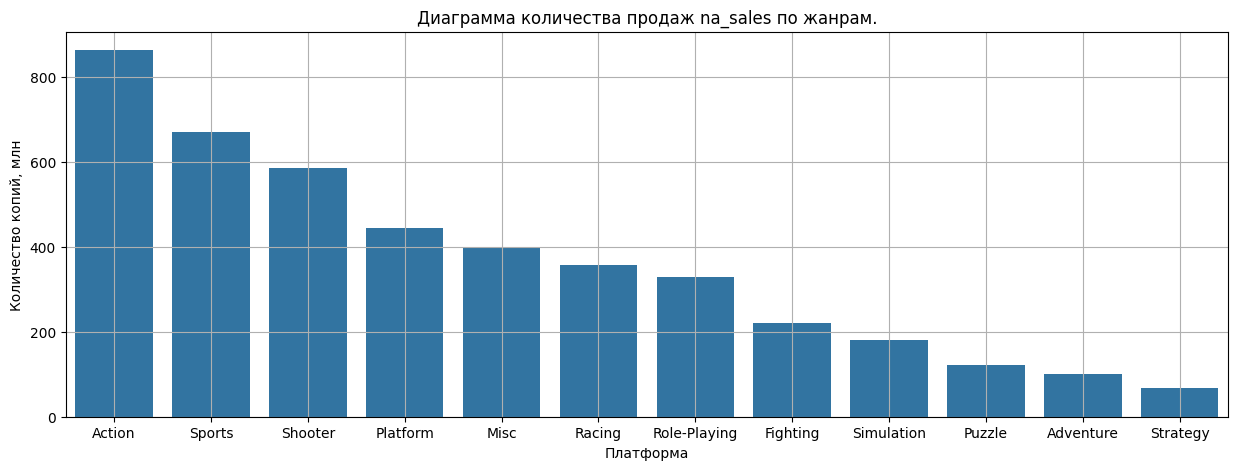

In [92]:
# отсортируем датафрейм по "na_sales"
data_genre = data_genre.sort_values('na_sales', ascending=False)

# построим диаграмму по платформам "na_sales"
sns.barplot(data=data_genre, x=data_genre.index, y='na_sales')
plt.gcf().set_size_inches(15, 5)
plt.title('Диаграмма количества продаж na_sales по жанрам.')
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн')

Text(0, 0.5, 'Количество копий, млн')

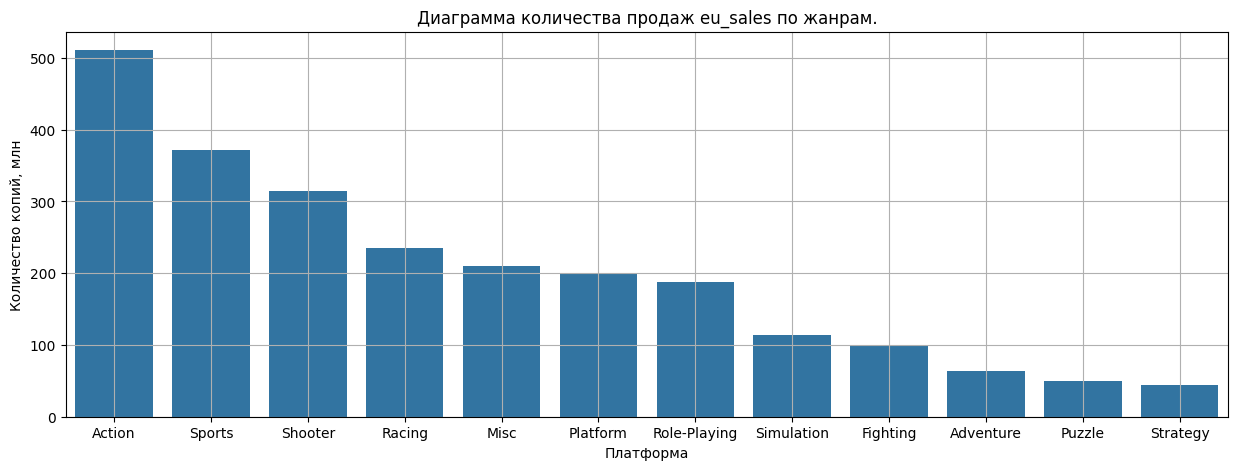

In [93]:
# отсортируем датафрейм по "eu_sales"
data_genre = data_genre.sort_values('eu_sales', ascending=False)

# построим диаграмму по платформам "na_sales"
sns.barplot(data=data_genre, x=data_genre.index, y='eu_sales')
plt.gcf().set_size_inches(15, 5)
plt.title('Диаграмма количества продаж eu_sales по жанрам.')
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн')

Text(0, 0.5, 'Количество копий, млн')

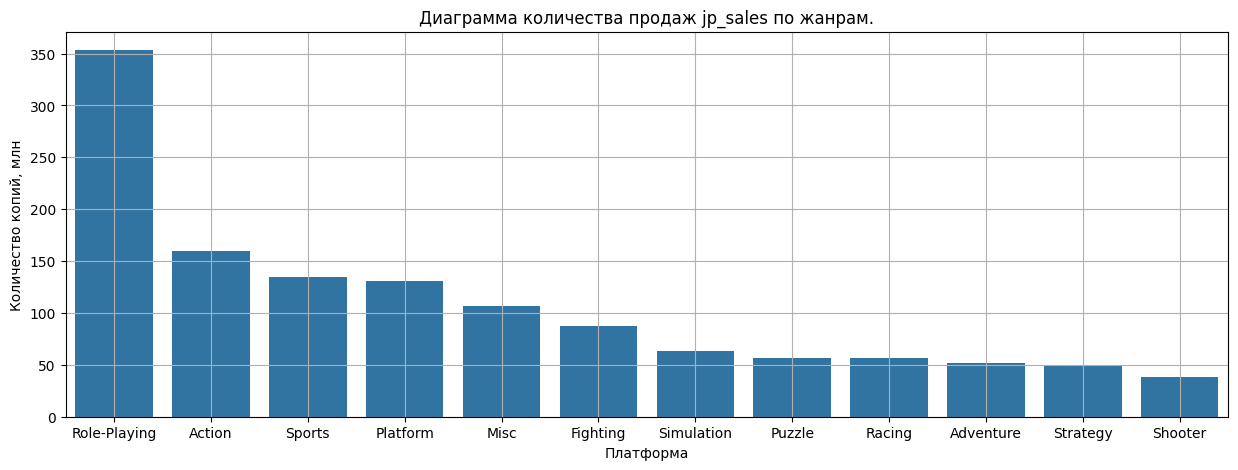

In [94]:
# отсортируем датафрейм по "jp_sales"
data_genre = data_genre.sort_values('jp_sales', ascending=False)

# построим диаграмму по платформам "jp_sales"
sns.barplot(data=data_genre, x=data_genre.index, y='jp_sales')
plt.gcf().set_size_inches(15, 5)
plt.title('Диаграмма количества продаж jp_sales по жанрам.')
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн')

**Вывод по жанрам 4.2**

Как и в случае с платформами, распределение по жанрам в каждом регионе разное.

 - Регион "NA". В ТОП-5 попали платформы Action (свыше 800 млн), Sports (свыше 600 млн), Shooter (почти 600 млн), Platform (свыше 400 млн) и Misc (400 млн). Данный регион продает больше всего копий.
 - Регион "EU". В ТОП-5 попали платформы Action (свыше 500 млн), Sports (свыше 350 млн), Shooter (свыше 300 млн), Racing (почти 250 млн) и Misc (свыше 200 млн). Данный регион второй по общему количеству продаж.
 - Регион "JP". В ТОП-5 попали платформы Role-Playing (свыше 350 млн), Action (свыше 150 млн), Sports (порядка 135 млн), Platform (порядка 135 млн) и Misc (чуть более 100 млн). Данный регион продает меньше всего копий.
 
 
Все 3 региона любят жанр Action. В двух регионах он находится на 1 месте, на третьем на 2 месте. Регионы "NA" и "EU" отличаются только одни жанром, находящемся на 4-ом месте. Все остальные места в ТОП-5 находятся на одинаковых местах. Также, во всех 3 регионах в ТОП-5 находятся жанры Action, Sports и Misc. Это основная схожесть между 3 регионами.

<a class='anchor' id='4.3-bullet'></a>
### Распределени продаж по возрастных категориям

In [95]:
# создадим датафрейм data_rating с данными о продажах по каждому региону
data_rating = data.groupby('rating').agg({'na_sales':'sum', 'eu_sales': 'sum', 'jp_sales': 'sum'})
data_rating

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,1274.24,703.86,197.96
E10+,345.50,183.35,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,742.89,480.00,63.58
RP,0.00,0.03,0.00
T,747.60,421.79,150.70


Text(0, 0.5, 'Количество копий, млн')

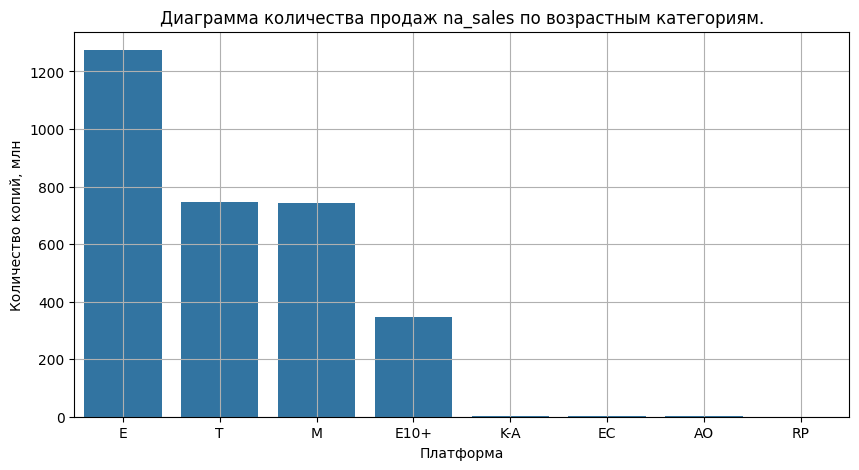

In [96]:
# отсортируем "data_rating" по "na_sales"
data_rating = data_rating.sort_values('na_sales', ascending=False)

# построим диаграмму распределения продаж по возрастным категориям в "na_sales"
sns.barplot(data=data_rating, x=data_rating.index, y='na_sales')
plt.gcf().set_size_inches(10, 5)
plt.title('Диаграмма количества продаж na_sales по возрастным категориям.')
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн')

Text(0, 0.5, 'Количество копий, млн')

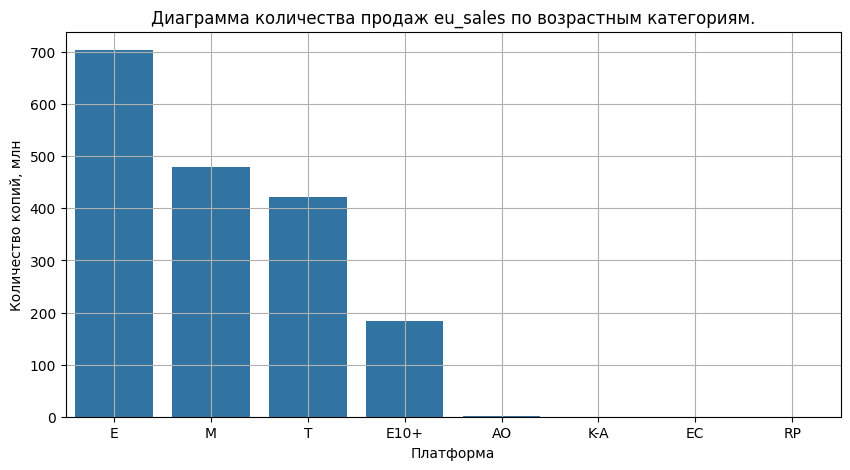

In [97]:
# отсортируем "data_rating" по "eu_sales"
data_rating = data_rating.sort_values('eu_sales', ascending=False)

# построим диаграмму распределения продаж по возрастным категориям в "eu_sales"
sns.barplot(data=data_rating, x=data_rating.index, y='eu_sales')
plt.gcf().set_size_inches(10, 5)
plt.title('Диаграмма количества продаж eu_sales по возрастным категориям.')
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн')

Text(0, 0.5, 'Количество копий, млн')

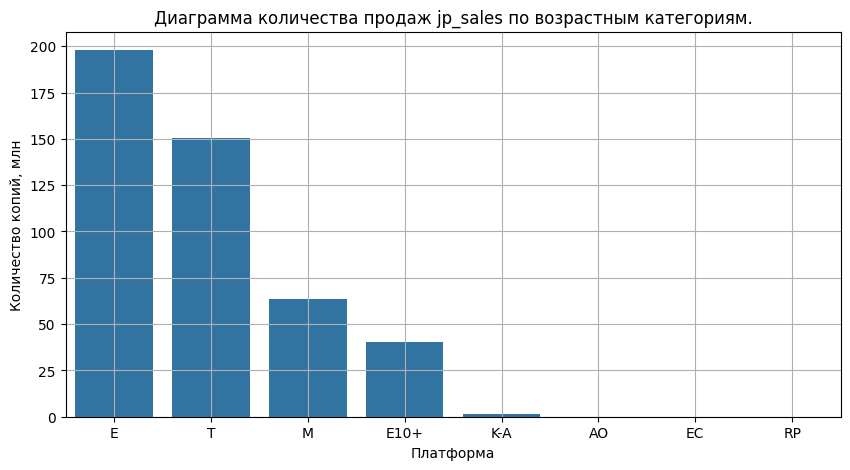

In [98]:
# отсортируем "data_rating" по "jp_sales"
data_rating = data_rating.sort_values('jp_sales', ascending=False)

# построим диаграмму распределения продаж по возрастным категориям в "jp_sales"
sns.barplot(data=data_rating, x=data_rating.index, y='jp_sales')
plt.gcf().set_size_inches(10, 5)
plt.title('Диаграмма количества продаж jp_sales по возрастным категориям.')
plt.grid(True)
plt.xlabel('Платформа')
plt.ylabel('Количество копий, млн')

**Вывод по возрастным категориям 4.3**

Диаграммы показали, что во всех трех регионах в ТОП-3 возрастных категорий входят категории *"E", "T" и "M"*. Причем во всех трех первое место с большие отрывом за категорией "E", второе и треть за "T" и "M" соответственно в регионах "NA" и "JP", а вот в регионе "EU" второе и третье за "M" и "T".

<a class='anchor' id='5-bullet'></a>
## Проверка гипотез

<a class='anchor' id='5.1-bullet'></a>
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [99]:
# создадим датафрейм "data_xone" для "XOne"
data_xone = data.loc[data['platform'] == 'XOne', 'user_score']
# выведем информацию о датафрейме "data_xbox"
data_xone.describe()

count     247.0
unique     51.0
top         7.4
freq       45.0
Name: user_score, dtype: float64

In [100]:
# создадим датафрейм "data_pc" для "PC"
data_pc = data.loc[data['platform'] == 'PC', 'user_score']
# выведем информацию о датафрейме "data_xbox"
data_pc.describe()

count     957.0
unique     71.0
top         7.4
freq       77.0
Name: user_score, dtype: float64

**Гипотеза гласит, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.** Значит, будем проверять двусторонню гипотезу по двум независимым датафреймам "data_xone" и "data_pc". Используем метод "st.ttest_ind" - двухвыборочный Т-тест для независимых выборок. В параметр *"equal_var"* передадим значение "False" так как стандартные отклонения, а значит и дисперсии у генеральных совокупностей разные (стандартные отклонения равн 1.25 и 1.37 соответственно), да и размеры генеральных совокупностей различны (247 против 957). 

Сформулируем нулевую и альтернативную гипотезы:

**H0 - Средняя пользовательская оценка платформы XOne = Средняя пользовательская оценка платформы PC.**

**H1 - Средняя пользовательская оценка платформы XOne != Средняя пользовательская оценка платформы PC.**

Проверим гипотезу.

In [101]:
# выведем среднее значение 'data_xone'
print('Средняя оценка пользователей XOne', data_xone.mean())
# выведем среднее значение 'data_pc'
print('Средняя оценка пользователей PC', data_pc.mean())

# зададим уровень статистической значимости
alpha = 0.05

# проведем стат. тест о равенстве продолжительности поездок
results = st.ttest_ind(list(data_xone), list(data_pc), equal_var=False)

# выведем значение p-value
print(f'P-value равняется {results.pvalue}')

# сравним p-значение с заданным уровнем значимости alpha
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Оценки пользователей в XOne и PC отличаются.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Оценки пользователей в XOne и PC действительно равны.')


Средняя оценка пользователей XOne 6.761538461538461
Средняя оценка пользователей PC 7.165099268547563
P-value равняется 1.2855599263189025e-05
Отвергаем нулевую гипотезу. Оценки пользователей в XOne и PC отличаются.


**Нулевая гипотеза отвергнута. Значит, средняя оценка пользователей на платформе "Xbox One" отличается от средней оценка пользователей на платформе "PC".**

<a class='anchor' id='5.2-bullet'></a>
### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [102]:
# создадим датафрейм "data_action" для жанра "Action"
data_action = data.loc[data['genre'] == 'Action', 'user_score']
# выведем информацию о датафрейме "data_action"
data_action.describe()

count     3307.0
unique      78.0
top          7.4
freq      1568.0
Name: user_score, dtype: float64

In [103]:
# создадим датафрейм "data_sports" для жанра "Sports"
data_sports = data.loc[data['genre'] == 'Sports', 'user_score']
# выведем информацию о датафрейме "data_sports"
data_sports.describe()

count     2305.0
unique      81.0
top          7.4
freq      1254.0
Name: user_score, dtype: float64

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.** Значит, будем проверять двусторонню гипотезу по двум независимым датафреймам "data_action" и "data_sports". Используем метод "st.ttest_ind" - двухвыборочный Т-тест для независимых выборок. В параметр *"equal_var"* передадим значение "False" так как стандартные отклонения, а значит и дисперсии у генеральных совокупностей разные (стандартные отклонения равны 1.06 и 1.13 соответственно), да и размеры генеральных совокупностей различны (3307 против 2306). 

Сформулируем нулевую и альтернативную гипотезы:

**H0 - Средняя пользовательская оценка жанра Action = Средняя пользовательская оценка жанра Sports.**

**H1 - Средняя пользовательская оценка жанра Action != Средняя пользовательская оценка жанра Sports.**

Проверим гипотезу.

In [104]:
# выведем среднее значение 'data_action'
print('Средняя оценка пользователей data_action', data_action.mean())
# выведем среднее значение 'data_sports'
print('Средняя оценка пользователей data_sports', data_sports.mean())

# зададим уровень статистической значимости
alpha = 0.01

# проведем стат. тест о равенстве средних двух датафреймов
results = st.ttest_ind(list(data_action), list(data_sports), equal_var=False)

# выведем значение p-value
print(f'P-value равняется {results.pvalue}')

# сравним p-значение с заданным уровнем значимости alpha
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Оценки пользователей в жанрах Action и Sports действительно отличаются.')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Оценки пользователей в жанрах Action и Sports равны.')

Средняя оценка пользователей data_action 7.214333232537244
Средняя оценка пользователей data_sports 7.19045553145321
P-value равняется 0.4251635134384406
Не получилось отвергнуть нулевую гипотезу. Оценки пользователей в жанрах Action и Sports равны.


**Нулевую гипотезу отвергнуть не удалось. Значит, оценки пользователей в жанрах Action и Sports равны.**

**Вывод 5**

На данном этапе проведена проверка двух гипотез.

1. **Гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**
   
   Сформулированы нулевая и альтернативная гипотезы
   
   **H0 - Средняя пользовательская оценка платформы XOne = Средняя пользовательская оценка платформы PC.**
   <br>**H1 - Средняя пользовательская оценка платформы XOne != Средняя пользовательская оценка платформы PC.**
   
   Средние оценка пользователей XOne и PC составили 6.7615384615384615 и 7.165099268547545 соответственно.
   
   ИТОГ: *Нулевая гипотеза отвергнута*. **Значит, средняя оценка пользователей на платформе "Xbox One" отличается от средней оценка пользователей на платформе "PC".**
   
   
2. **Гипотеза - cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**
   
   Сформулированы нулевая и альтернативная гипотезы

   **H0 - Средняя пользовательская оценка жанра Action = Средняя пользовательская оценка жанра Sports.**
   <br>**H1 - Средняя пользовательская оценка жанра Action != Средняя пользовательская оценка жанра Sports.**
   
   Средние оценки пользователей жанра Action и Sports равны 7.214333232537044 и 7.189722463139636 соответственно.
   
   ИТОГ: *Нулевую гипотезу отвергнуть не удалось.* **Значит, оценки пользователей в жанрах Action и Sports равны.**

<a class='anchor' id='6-bullet'></a>
# Общий вывод

<div style="border:solid Blue 2px; padding: 20px">
Сборный проект был выполнен на основе одного источника данных, хранящих историческую информацию о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

В ходе исследования были проведены следующие работы:

1. **Проведена загрузка данных в датафрейм "data".**

В датафрейме 16715 строк и 11 столбцов.  Типы данных - *object* и *float64*.


2. **Проведена подготовка данных, в ходе которой:**

   * Удалены столбцы с пропусками в столбцах *"name", "year_of_release" и  "genre"*;
   * Заменены пропуски на медианные значения категорий, поделенных по жанру в столбцах *"critic_score" и "user_score"*.
   * Оставлены без изменений пропуски в столбце *"rating"*, так как заменить их не на что.
   * Найдено 2 неявных дубликата по 4 столбцам (name, platform, year_of_release, genre), причем количество продаж в одном из дубликатов равнялось 0. Данные дубликаты были удалены.
   
Процент удаленных данных составил 1.6%.
   
Также, добавлен новый столбец *"sales"* с данными об общем количестве проданных копий.


3. **Проведен исследователький анализ данных.**

   * В ходе *исследования количества выпускаемых игр ежегодно* было выявлено, что игры выпускались с 1980 по 2016 год. На начальном этапе продажи составляли порядка 10-20 млн продаж в год. 
   <br>Ощутимый рост популярности игр начался в середине 90-х, пик же пришелся на 2008-2009 годы и составил более 1400 млн копий продаж.
   <br>Затем, начиная с 2010 началась понижательная тенденция год к году, с небольшим росто в 2014 и 2015 годах. 
   <br>По состояния на 2016 год продажи составили порядка 500 млн копий.
   
   * *Исследование по платфмормам* показало, что средний срок "жизни" платформы составляет поряка 10 лет. За это время платформа выходит на рынок, развивается, а затем уходит в небытие. При этом нормальным значением продаж платформы за 10 лет существования является промежуток между 22 и 310 млн копий.
   
   Анализ платформ с помощью в период с 2012 по 2016 год включительно позволили сделать прогноз на 2017 год. 
   Согласно этому прогнозу, *из 11 платформ, продававших игры с 2012 по 2016 год, 3 платформы имеют положительные прогнозы продаж на 2017 год и 2 имеют нейтральные прогнозы.*
   - PS4 - <font color='green'>Положительный прогноз</font>. Молодая платформа (4 года). Прогноз - 50 млн продаж на 2017 год.
   - XOne - <font color='green'>Положительный прогноз</font>. Молодая платформа (4 года). Прогноз - 20 млн продаж на 2017 год.
   - PC - <font color='green'>Положительный прогноз</font>. Стародавняя платформа (26 лет). Прогноз изменен с "нейтрального" после проведения исследования с помощью диаграммы размаха и столбчатой диаграммы, которые показали крепость данной платформы на рынке и способность показывать сильный и уверенный рост после серьезных просадок. Ожидается не менее 2-4 млн продаж на 2017 с потенциалом роста.
   - 3DS - <font color='orange'>Нейтральный прогноз</font>. Устаревающая платформа (6 года). Прогноз - 15 млн продаж на 2017 год.
   - PSV - <font color='orange'>Нейтральный прогноз</font>. Устаревающая платформа (6 года). Прогноз - 2 млн продаж на 2017 год.
   
   Доля потенциально успешных платформ (5 платформ) из общего количество актульных платформ на период с 2012 по 2016 год (11 платформ) менее 50%. При этом на каждой платформе наблюдается понижательная тенденция в актуальный период, что вполне коррелирует с глобальной ситуацией на рынке игры (с 2008 года продажи снижаются год к году, с небольшими и немногочисленными отскоками).
   
   * *Исследование зависимости между продажами и оценками критиков и пользователей показало, что не стоит недооценивать влияние ни оценок критиков, ни оценок пользователей, однако, все же большее внимание стоит уделить получению высоких оценок именно от критиков. Им люди доверяют больше, поэтому и покупают игры охотнее с высоким рейтингом от профессионалов.*
   
   * *Исследование продаж по жанрам* показало: 
   
   К **средними значениям** количества продаж относятся продажи от 0.1375 до 0.2125 млн копий. К данной категории относятся следующие жанры:

   - Simulation (0.15 млн);
   - Misc (0.16 млн);
   - Role-Playing (0.17 млн);
   - Action (0.18 млн);
   - Racing (0.18 млн).
   
   К **особо прибыльным жанрам** относятся следующие жанры:

   - Fighting (0.215 млн);
   - Sports (0.22 млн);
   - Shooter (0.24 млн);
   - Platform (0.27 млн).
   
   К **НЕ прибыльным жанрам** относятся следующие жанры:

   - Strategy (0.10 млн);
   - Puzzle (0.10 млн);
   - Adventure (0.05 млн).
    
    
4. **Составление портрета пользователя каждого региона**

   *Распределение продаж по платформам показало следующее:*

    - Регион "NA". В ТОП-5 попали платформы X360 (почти 600 млн), PS2 (свыше 550 млн), Wii (почти 400 млн), PS3 (свыше 350 млн) и DS (свыше 300 млн). Данный регион продает больше всего копий.
    - Регион "EU". В ТОП-5 попали платформы PS2 (почти 350 млн), 3DO (свыше 300 млн), 3DS (свыше 250 млн), DC (свыше 250 млн) и DS (свыше 200 млн). Данный регион второй по общему количеству продаж.
    - Регион "JP". В ТОП-5 попали платформы DS (175 млн), PS (порядка 140 млн), PS2 (порядка 135 млн), SNES (порядка 115 млн) и 3DS (чуть более 100 млн). Данный регион продает меньше всего копий.
   
   *Распределение продаж по жанрам показало следующее:*
   
    - Регион "NA". В ТОП-5 попали платформы Action (свыше 800 млн), Sports (свыше 600 млн), Shooter (почти 600 млн), Platform (свыше 400 млн) и Misc (400 млн). Данный регион продает больше всего копий.
    - Регион "EU". В ТОП-5 попали платформы Action (свыше 500 млн), Sports (свыше 350 млн), Shooter (свыше 300 млн), Racing (почти 250 млн) и Misc (свыше 200 млн). Данный регион второй по общему количеству продаж.
    - Регион "JP". В ТОП-5 попали платформы Role-Playing (свыше 350 млн), Action (свыше 150 млн), Sports (порядка 135 млн), Platform (порядка 135 млн) и Misc (чуть более 100 млн). Данный регион продает меньше всего копий.
    
    *Распределени продаж по возрастных категориям* показало, что во всех трех регионах в ТОП-3 возрастных категорий входят категории *"E", "T" и "M"*. Причем во всех трех первое место с большие отрывом за категорией "E", второе и третье за "T" и "M" соответственно в регионах "NA" и "JP", а вот в регионе "EU" второе и третье за "M" и "T".
    
    
5. **Проверка гипотез**

   * *Проверена гипотеза о том, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.* Была выдвинута нулевая и алтернативная гипотезы, в ходе проверки которых, Нулевая гипотеза была отвергнута, Значит, средняя оценка пользователей на платформе "Xbox One" отличается от средней оценка пользователей на платформе "PC".
   * *Проверена гипотеза о том, что Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.* Была выдвинута нулевая и альтернативная гипотезы, в ходе проверки которых Нулевую гипотезу отвергнуть не удалось, значит, оценки пользователей в жанрах Action и Sports равны.
   
**Итог**

В общем и целом, портрет с самым большим потенциалом на успех рисуется следующий:
   * Платформа - **X360, PS2, Wii, PS3 и другие из ТОП-5 платформ в зависимости от региона продаж**;
   * Возраст платформы **не более 5 лет**;
   * Жанр игры - **Action, Role-Playing, Shooter и другие из ТОП-5 жанров в зависимости от региона продаж**;
   * Возрастная категория - **желательно "E", "T" или "M"**;
   * **Высокий рейтинг оценок критиков (от 60)**.
  
  
**РЕКОМЕНДАЦИИ**

Что же касается рекоммендаций по ставке на какую-либо платформу, то я бы ставил на платформы PS4 и XOne с видом на 2017 год и далее в регионе "EU" (в данном регионе PS4 продает больше всего копий). При этом, я обратил бы внимание на регион "NA" и, особенно, на регион "JP" продажи в котором негативно отличаются от продаж в двух других регионах. 
А именно:
   - В регионе *"NA"* добавить игры ходовых жанров *Action, Sports, Shooter, Platform и Misc. Возрастные категории "E", "T" и "M".*
   - В регионе *"JP"* добавить игры ходовых жанров *Role-Playing, Action, Sports, Platform и Misc. Возрастные категории "E", "T" и "M".*
   - Регион *"EU"* хоть и отличается самыми большими продажами, добавить в него топовые жанры тоже не помешает, а именно *Action, Sports, Shooter, Racing и Misc. Возрастные категории "E", "T" и "M".*
   
Помимо данных жанров, особо популярных в каждом из регионов, в каждом регионе следует добавить жанры, лучше всего продаваемые на глобальном рынке, это - *Fighting, Sports, Shooter и Platform*.
<br>Помимо данных манипуляций, я бы поработал над качеством продаваемых игр, с целью повышения оценки критиков. 
</div>